# Data Mining  Project
#### Amir Ilan 322868662, Noam Diamant 208520262, Maya Naor 315176362

Import libraries and load the data

In [1254]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn import svm
from sklearn.model_selection import KFold 
from scipy import stats



In [1255]:
# for inline plots in jupyter
%matplotlib inline 
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes
df = pd.read_csv("./hotels_train.csv") # load the data from the CSV file

### 1. Show the data information, e.g., types of attributes, the attributes values etc.

Shape of the data | number of reservations

In [1256]:
print("Shape: ", df.shape)
print("# reservations are: ", df.shape[0])
print("# attributes are: ", df.shape[1])

Shape:  (27213, 18)
# reservations are:  27213
# attributes are:  18


Types of the attributes

In [1257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

-> We have floats, ints and strings

Attributes values

In [1258]:
df.head(10)

ID  weekend_nights  week_nights    room_type  board_type  n_adults  \
0  INN09588               1            5  Room_Type 1  half board         2   
1  INN07691               0            3  Room_Type 1         NaN         2   
2  INN32192               0            2  Room_Type 4  half board         1   
3  INN32218               1            2  Room_Type 1         NaN         2   
4  INN02994               1            3  Room_Type 4  half board         2   
5  INN19311               0            2  Room_Type 1  half board         2   
6  INN13835               2            4  Room_Type 4  half board         3   
7  INN15297               2            3  Room_Type 1         NaN         2   
8  INN17084               0            2  Room_Type 1  full board         2   
9  INN11644               0            3  Room_Type 1   breakfast         2   

   n_less_12  n_more_12  booked_tour  n_requests  lead_time purchase_type  \
0          0          0            0           2       34.0        Online   
1          0          0            0           0      365.0           NaN   
2          0          0            0           1      148.0        Online   
3          0          0            0           0      502.0       Offline   
4          0          1            0           2       32.0       Offline   
5          0          0            0           2      414.0        Online   
6          0          0            0           2      168.0        Online   
7          0          0            0           1       92.0           NaN   
8          0          0            0           1        9.0        Online   
9          0          0            0           1      180.0       Offline   

   n_p_cacellation  n_p_not_cacellation  repeated   price        date  \
0                0                    0         0  108.40  11/28/2018   
1                0                    0         0     NaN  11/03/2018   
2                0                    0         0  137.30  05/06/2018   
3                0                    0         0  127.00   9/26/2018   
4                0                    0         0  110.00  10/19/2017   
5                0                    0         0   98.30  12/20/2018   
6                0                    0         0  123.42   5/28/2018   
7                0                    0         0   78.90   3/27/2018   
8                0                    0         0  136.80  10/21/2018   
9                0                    0         0  110.00   6/16/2018   

   is_canceled  
0            0  
1            1  
2            0  
3            1  
4            0  
5            1  
6            0  
7            0  
8            0  
9            0

From the information above, we can identify missing values, attribute data types, and any mismatched data types.

Missing values: Present in the attributes 'board_type', 'lead_time', 'purchase_type', 'price'.
Unmatched data type: The 'room_type' attribute has an object data type, but we will remove the 'Room_type' string for convenience.    

remove the 'room_type' string from 'room_type' colmun for convenience:

In [1259]:
# Use str.extract() to extract numeric values
df['room_type'] = df['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)

# Verify the data type after conversion
print(df["room_type"].dtype)

print(df['room_type'].info())

int32
<class 'pandas.core.series.Series'>
RangeIndex: 27213 entries, 0 to 27212
Series name: room_type
Non-Null Count  Dtype
--------------  -----
27213 non-null  int32
dtypes: int32(1)
memory usage: 106.4 KB
None


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mayan\AppData\Local\Temp\ipykernel_26056\3955945887.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['room_type'] = df['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)


### 2. Show the data statistics, e.g., distribution, skewness, median and more.
Split to nominal (string) and numerical (int) attributes

In [1260]:
numeric_col = df.describe().columns # to get the numeric column
col_names = ""
for col in numeric_col:
    col_names += col + ", "
col_names

'weekend_nights, week_nights, room_type, n_adults, n_less_12, n_more_12, booked_tour, n_requests, lead_time, n_p_cacellation, n_p_not_cacellation, repeated, price, is_canceled, '

In [1261]:
numeric_data = df[numeric_col]
nominal_data = df.drop(numeric_col, axis=1)

Numerical data:
For numerical data we would like to know the range of values, whether there are outliers, the distribution and other statistics, so first we will draw the histograms.

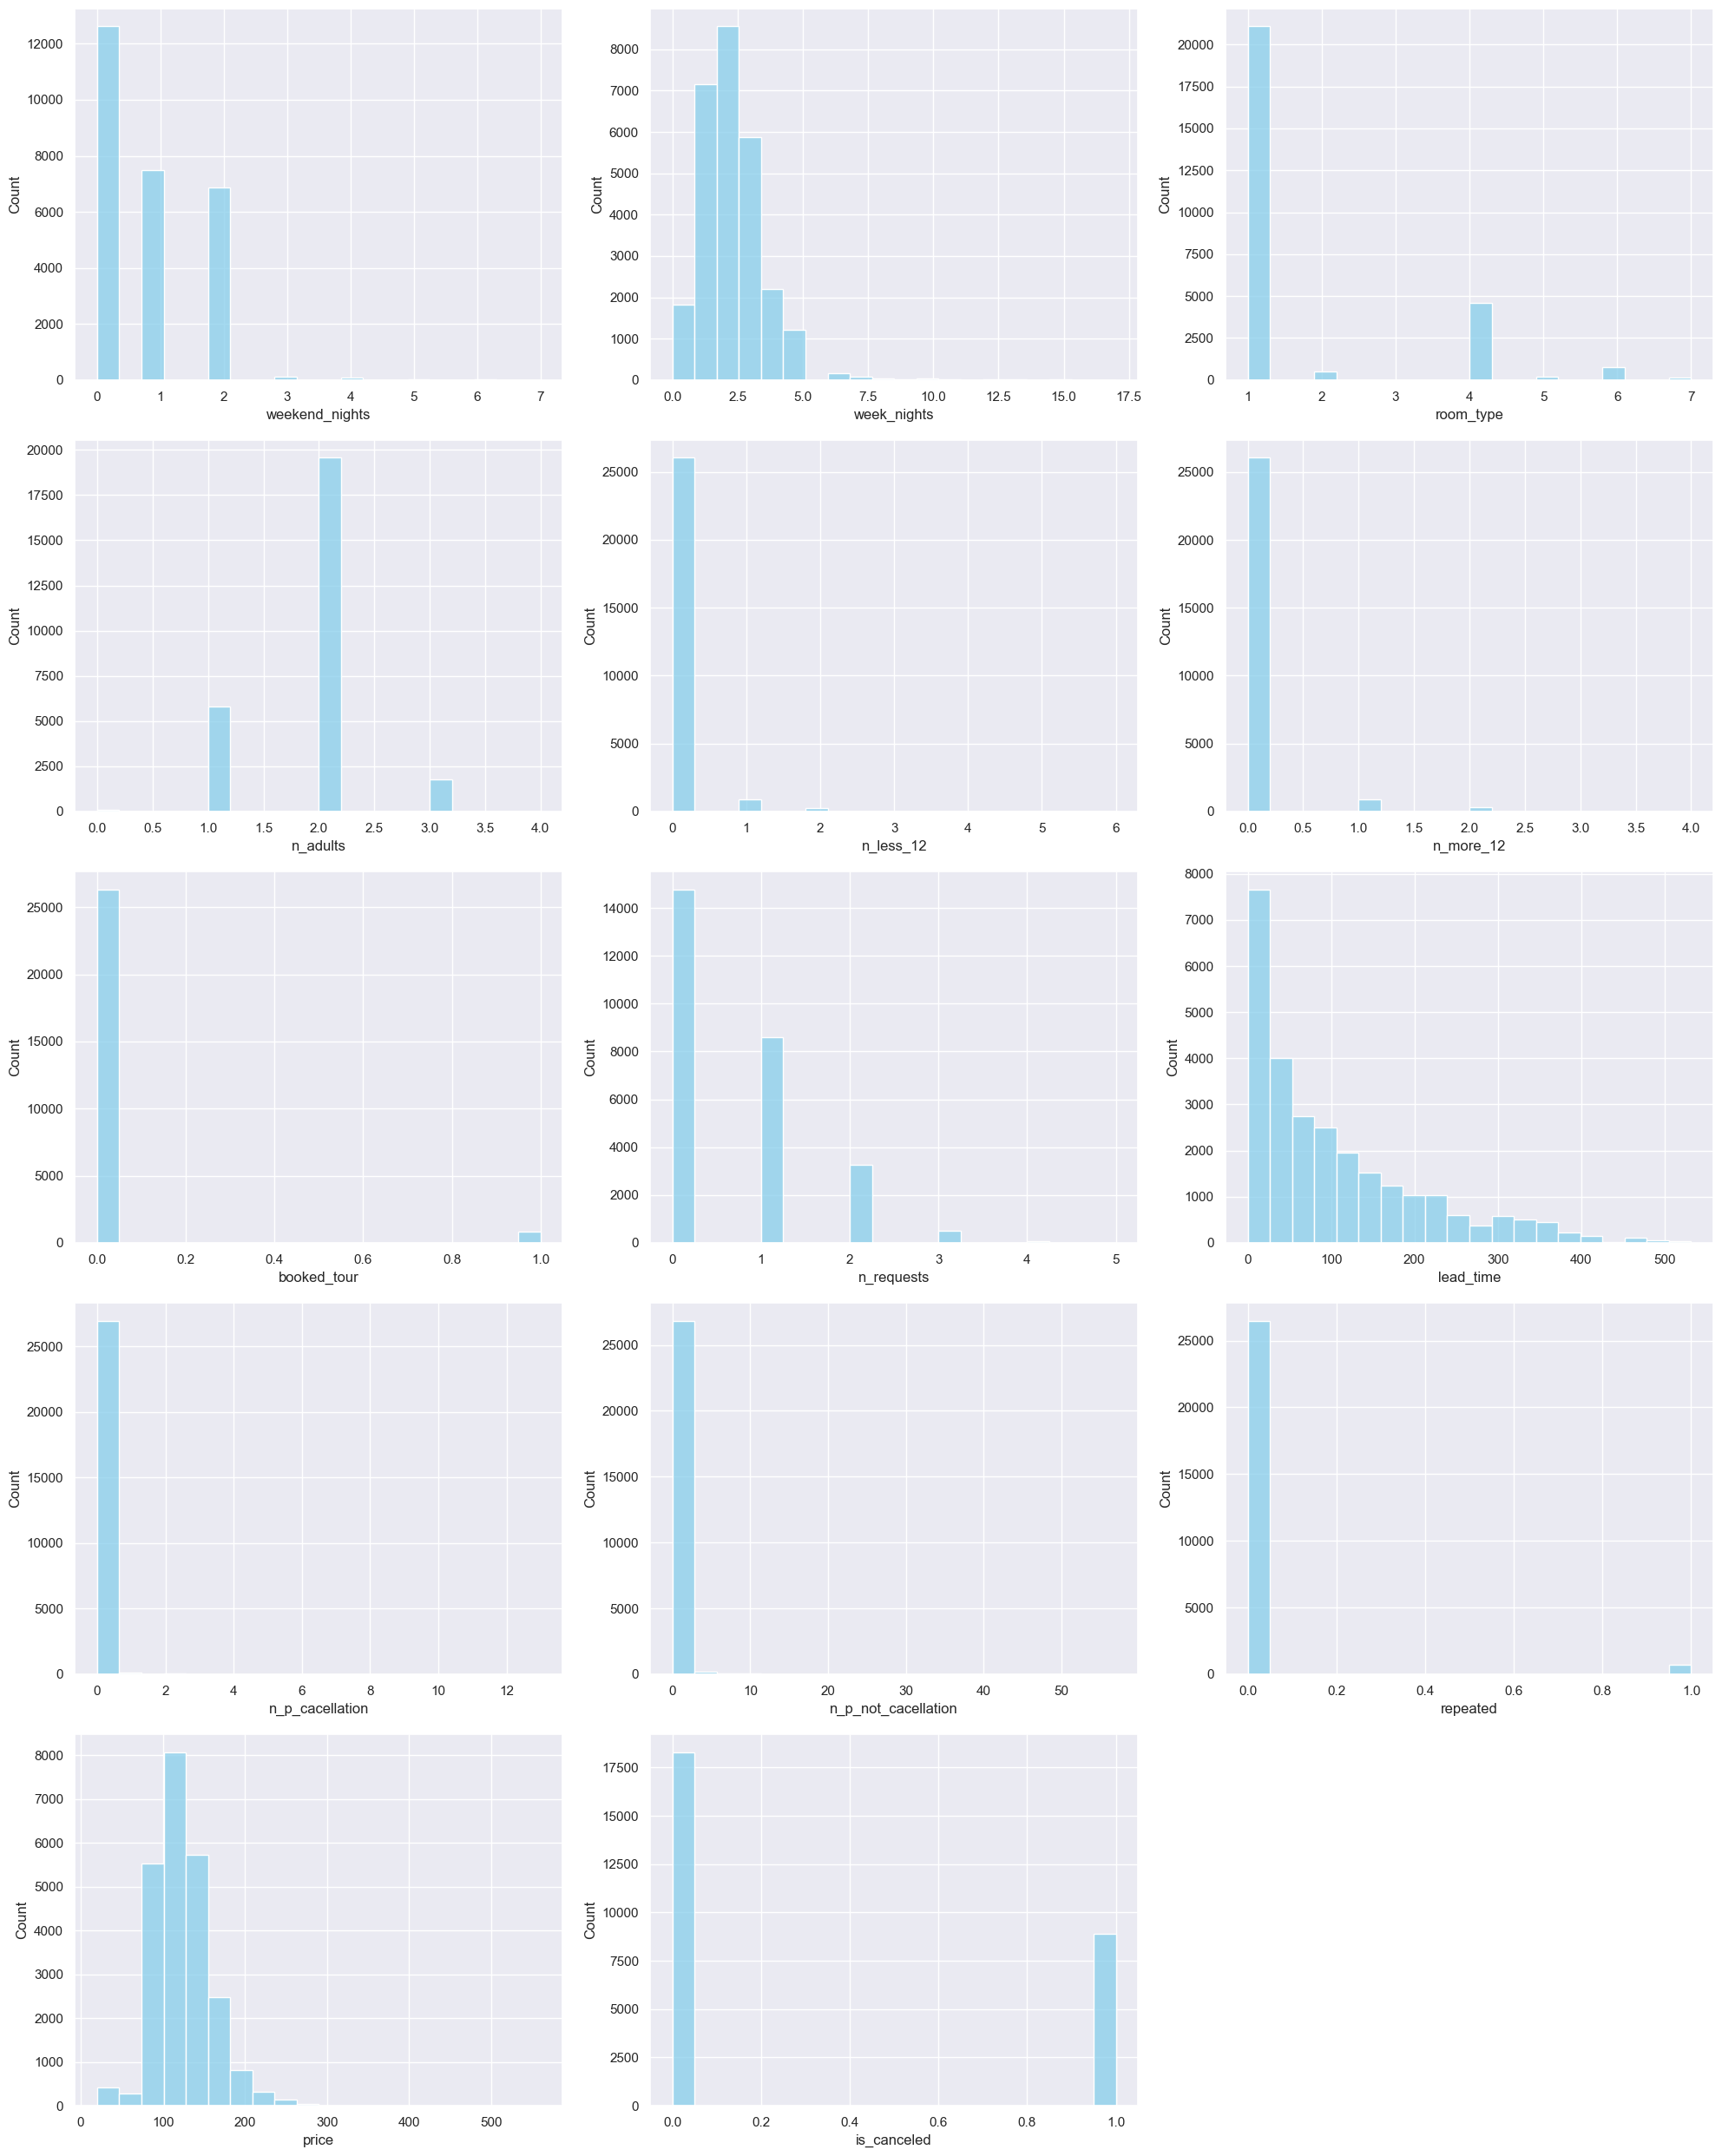

In [1262]:
# Number of plots
num_plots = len(numeric_col)

# Calculate number of rows needed (ceil division)
num_rows = (num_plots + 2) // 3  # +2 to account for the final row with less than 3 plots

# Create a large figure
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.histplot(numeric_data[col], bins=20, color='skyblue', ax=axes[i])

# Remove any unused subplots in the last row
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


From the histograms above it looks like 'price', 'lead_time' and 'week_nights' is normal distributed whereas the other attributes are not. Moreover, we can see that 'weekend_nights', 'n_adults', 'n_more_12', 'n_requests', 'room_type', 'booked_tour', 'n_p_cancellation', 'n_p_not_cancellation', 'repeated', 'month', 'day', 'year' and 'n_less_12' has only few values with importance to the order i.e. it's a categorical ordinal attribute.

Show statistic information for numerical data.

In [1263]:
numeric_data.describe()

weekend_nights   week_nights     room_type      n_adults     n_less_12  \
count    27213.000000  27213.000000  27213.000000  27213.000000  27213.000000   
mean         0.812810      2.197332      1.712637      1.845221      0.052989   
std          0.869317      1.403576      1.404446      0.519715      0.266150   
min          0.000000      0.000000      1.000000      0.000000      0.000000   
25%          0.000000      1.000000      1.000000      2.000000      0.000000   
50%          1.000000      2.000000      1.000000      2.000000      0.000000   
75%          2.000000      3.000000      1.000000      2.000000      0.000000   
max          7.000000     17.000000      7.000000      4.000000      6.000000   

          n_more_12   booked_tour    n_requests     lead_time  \
count  27213.000000  27213.000000  27213.000000  26794.000000   
mean       0.053357      0.031750      0.621100    102.952377   
std        0.268688      0.175336      0.785642    103.498942   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000     21.000000   
50%        0.000000      0.000000      0.000000     69.000000   
75%        0.000000      0.000000      1.000000    153.000000   
max        4.000000      1.000000      5.000000    532.000000   

       n_p_cacellation  n_p_not_cacellation      repeated         price  \
count     27213.000000         27213.000000  27213.000000  23808.000000   
mean          0.021975             0.155404      0.026421    123.455494   
std           0.346697             1.728693      0.160387     35.136566   
min           0.000000             0.000000      0.000000     20.000000   
25%           0.000000             0.000000      0.000000    100.300000   
50%           0.000000             0.000000      0.000000    119.450000   
75%           0.000000             0.000000      0.000000    140.000000   
max          13.000000            57.000000      1.000000    560.000000   

        is_canceled  
count  27213.000000  
mean       0.327674  
std        0.469374  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

#### Skewness
for the real numeric attributes

In [1264]:
for col in ['price', 'week_nights', 'lead_time']:
    print(col+':')
    print('\tskewness:', numeric_data[col].skew(axis = 0, skipna = True))
    print('\tmedian:', numeric_data[col].median(axis = 0, skipna = True))
    

price:
	skewness: 0.682392611272259
	median: 119.45
week_nights:
	skewness: 1.5422954469230514
	median: 2.0
lead_time:
	skewness: 1.291447308852505
	median: 69.0


We can also look at the probability

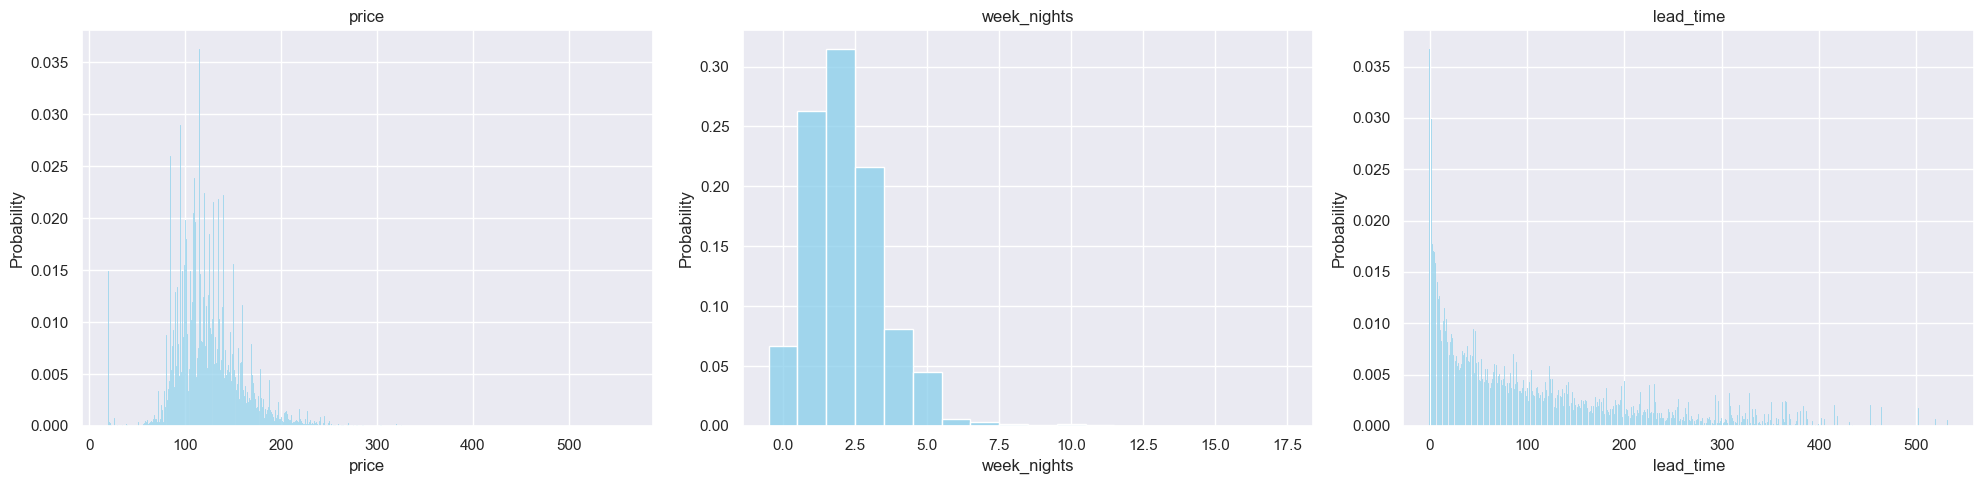

In [1265]:
# Create a figure with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# List of columns to plot
columns = ['price', 'week_nights', 'lead_time']

# Iterate through the columns and plot each one in its corresponding subplot
for i, col in enumerate(columns):
    sns.histplot(numeric_data[col], color='skyblue', stat="probability", discrete=True, ax=axes[i])
    axes[i].set_title(col)  # add title for each subplot

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Nominal data:
we will show the statistics for the nominal data

In [1266]:
describe_df_nominal = nominal_data.describe()
describe_df_nominal.loc['%freq'] = describe_df_nominal.apply(lambda x: np.round(x.loc['freq']/891, decimals=3))
describe_df_nominal

ID  board_type purchase_type        date
count      27213       19045         22366       27213
unique     27213           4             5         553
top     INN09588  half board        Online  10/13/2018
freq           1       14591         14306         188
%freq      0.001      16.376        16.056       0.211

Histograms

##### Insert the nominal missing values to the dataframe

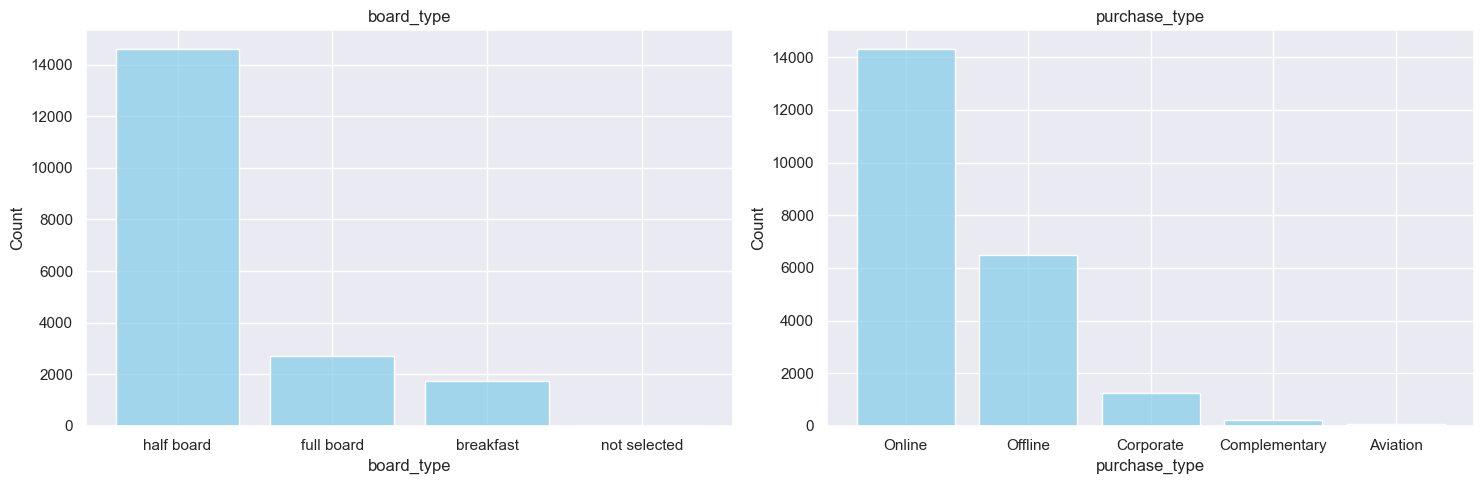

In [1267]:
dist_col = ['board_type', 'purchase_type']

# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Iterate through the columns and plot each one in its corresponding subplot
for i, col in enumerate(dist_col):
    sns.histplot(nominal_data[col], shrink=0.8, color='skyblue', ax=axes[i])
    axes[i].set_title(col)  # add title for each subplot

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### 3. Show and explain attributes correlations

In [1268]:
df[df.describe().columns].corr(method = 'pearson')

weekend_nights  week_nights  room_type  n_adults  \
weekend_nights             1.000000     0.172582   0.060986  0.106355   
week_nights                0.172582     1.000000   0.093326  0.105197   
room_type                  0.060986     0.093326   1.000000  0.270896   
n_adults                   0.106355     0.105197   0.270896  1.000000   
n_less_12                  0.019048     0.009291   0.276393 -0.005528   
n_more_12                  0.020736     0.020412   0.278152 -0.022964   
booked_tour               -0.033336    -0.052188   0.039589  0.009166   
n_requests                 0.060688     0.046046   0.145410  0.188380   
lead_time                  0.045434     0.149524  -0.106801  0.096608   
n_p_cacellation           -0.023784    -0.027565  -0.006050 -0.046387   
n_p_not_cacellation       -0.029500    -0.048246  -0.009804 -0.124772   
repeated                  -0.072326    -0.100375  -0.023882 -0.199585   
price                     -0.000601     0.020085   0.469287  0.301024   
is_canceled                0.066571     0.093008   0.026948  0.087098   

                     n_less_12  n_more_12  booked_tour  n_requests  lead_time  \
weekend_nights        0.019048   0.020736    -0.033336    0.060688   0.045434   
week_nights           0.009291   0.020412    -0.052188    0.046046   0.149524   
room_type             0.276393   0.278152     0.039589    0.145410  -0.106801   
n_adults             -0.005528  -0.022964     0.009166    0.188380   0.096608   
n_less_12             1.000000   0.125932     0.036395    0.094793  -0.040479   
n_more_12             0.125932   1.000000     0.020203    0.099084  -0.033408   
booked_tour           0.036395   0.020203     1.000000    0.091335  -0.062729   
n_requests            0.094793   0.099084     0.091335    1.000000  -0.099829   
lead_time            -0.040479  -0.033408    -0.062729   -0.099829   1.000000   
n_p_cacellation      -0.012620  -0.012587     0.021167    0.000753  -0.047808   
n_p_not_cacellation  -0.015822  -0.017378     0.068105    0.030748  -0.080618   
repeated             -0.025912  -0.029303     0.113914   -0.009791  -0.139704   
price                 0.257406   0.252388     0.057756    0.179417  -0.063702   
is_canceled           0.022208   0.023083    -0.086230   -0.250765   0.436932   

                     n_p_cacellation  n_p_not_cacellation  repeated     price  \
weekend_nights             -0.023784            -0.029500 -0.072326 -0.000601   
week_nights                -0.027565            -0.048246 -0.100375  0.020085   
room_type                  -0.006050            -0.009804 -0.023882  0.469287   
n_adults                   -0.046387            -0.124772 -0.199585  0.301024   
n_less_12                  -0.012620            -0.015822 -0.025912  0.257406   
n_more_12                  -0.012587            -0.017378 -0.029303  0.252388   
booked_tour                 0.021167             0.068105  0.113914  0.057756   
n_requests                  0.000753             0.030748 -0.009791  0.179417   
lead_time                  -0.047808            -0.080618 -0.139704 -0.063702   
n_p_cacellation             1.000000             0.473422  0.384761 -0.062945   
n_p_not_cacellation         0.473422             1.000000  0.545708 -0.120896   
repeated                    0.384761             0.545708  1.000000 -0.180356   
price                      -0.062945            -0.120896 -0.180356  1.000000   
is_canceled                -0.036572            -0.062216 -0.110125  0.144509   

                     is_canceled  
weekend_nights          0.066571  
week_nights             0.093008  
room_type               0.026948  
n_adults                0.087098  
n_less_12               0.022208  
n_more_12               0.023083  
booked_tour            -0.086230  
n_requests             -0.250765  
lead_time               0.436932  
n_p_cacellation        -0.036572  
n_p_not_cacellation    -0.062216  
repeated               -0.110125  
price                   0.144509  
is_

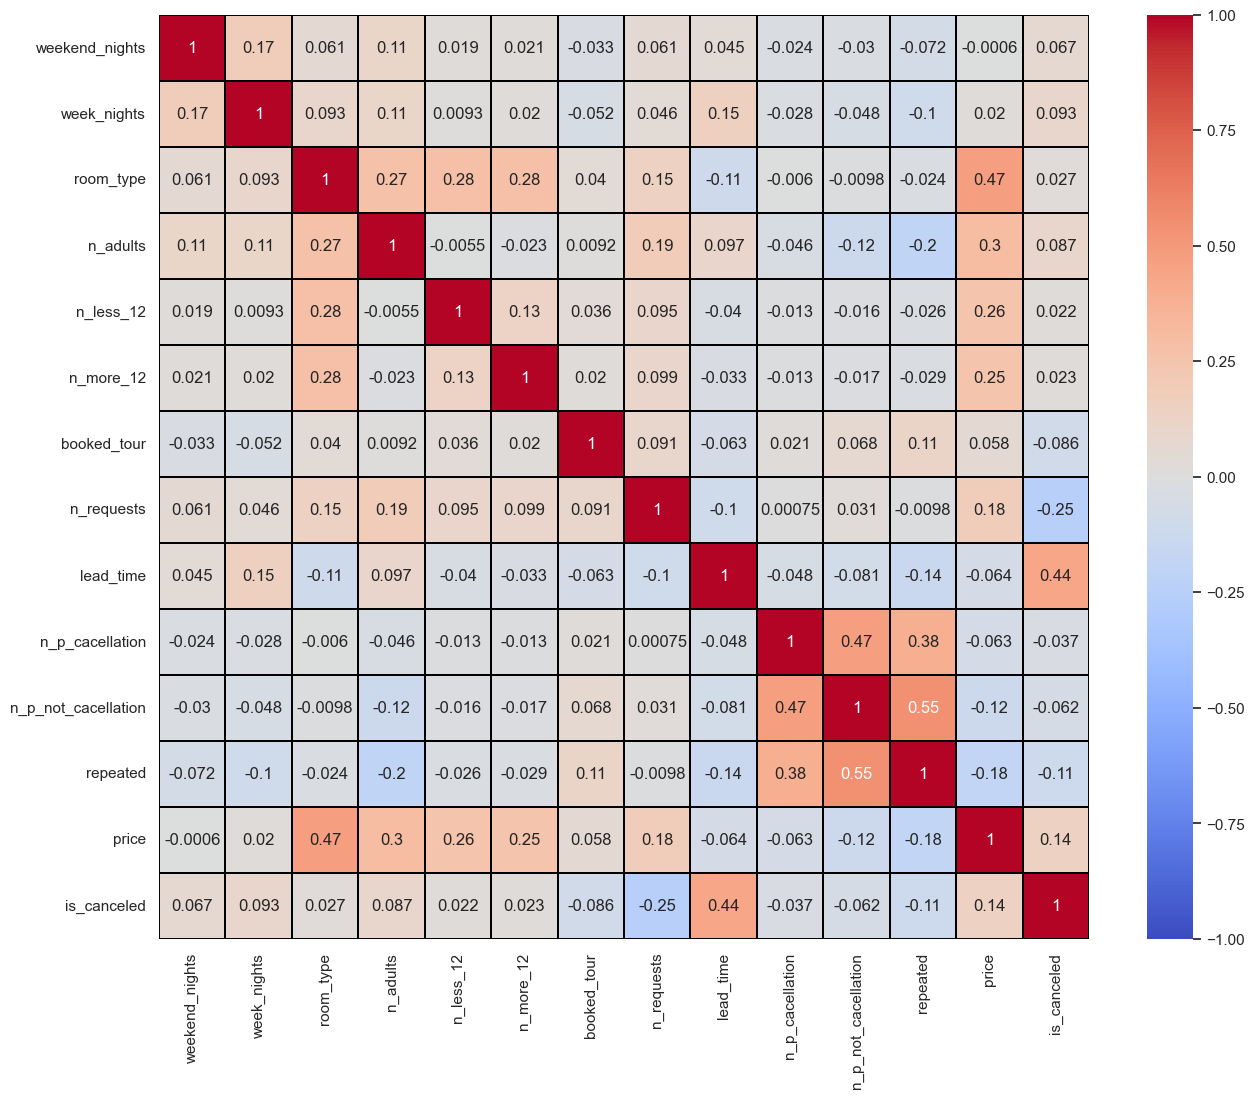

In [1269]:
f, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df[df.describe().columns].corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.2, linecolor='black')

### 4. Show and explain visualizations that present interesting insights from the data.

Target

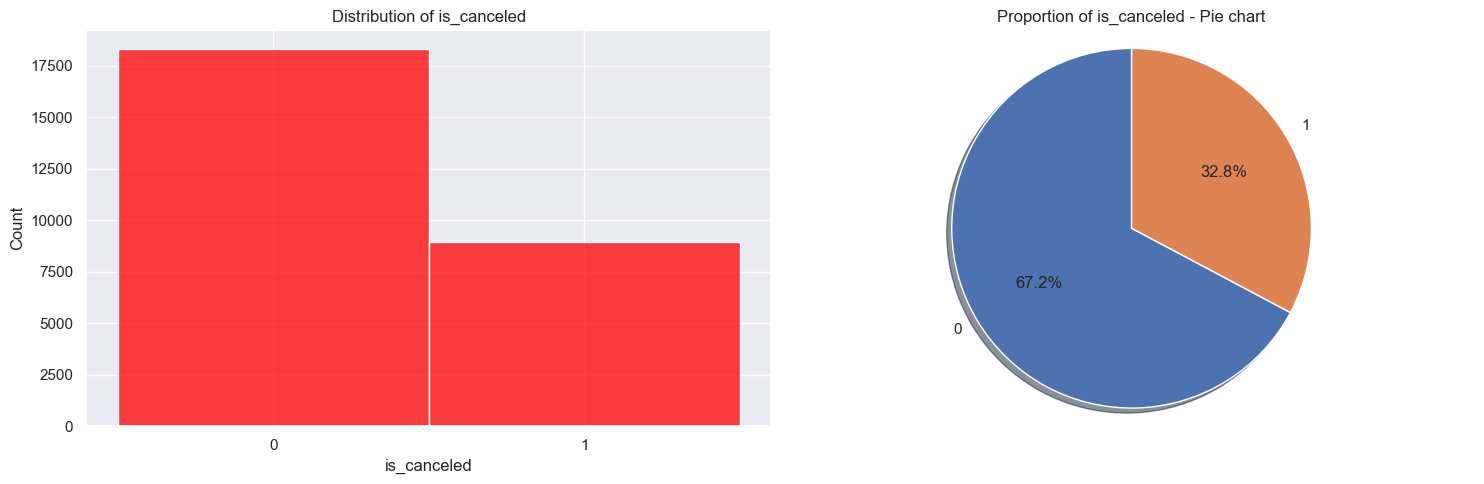

In [1270]:
# Create a figure with one row and two columns
target =pd.DataFrame(df['is_canceled']) 

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the displot on the first subplot
sns.histplot(target, x='is_canceled', color='red', discrete=True, ax=axes[0])
axes[0].set_title('Distribution of is_canceled')  # add title for the first subplot
axes[0].set_xticks([0, 1])  # Set x-ticks to show only 0 and 1

# Plot the pie chart on the second subplot
axes[1].pie(target['is_canceled'].value_counts(), labels=target['is_canceled'].unique(), autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].set_title('Proportion of is_canceled - Pie chart')  # add title for the second subplot

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Exploring the behavior of the attributes according to the target values

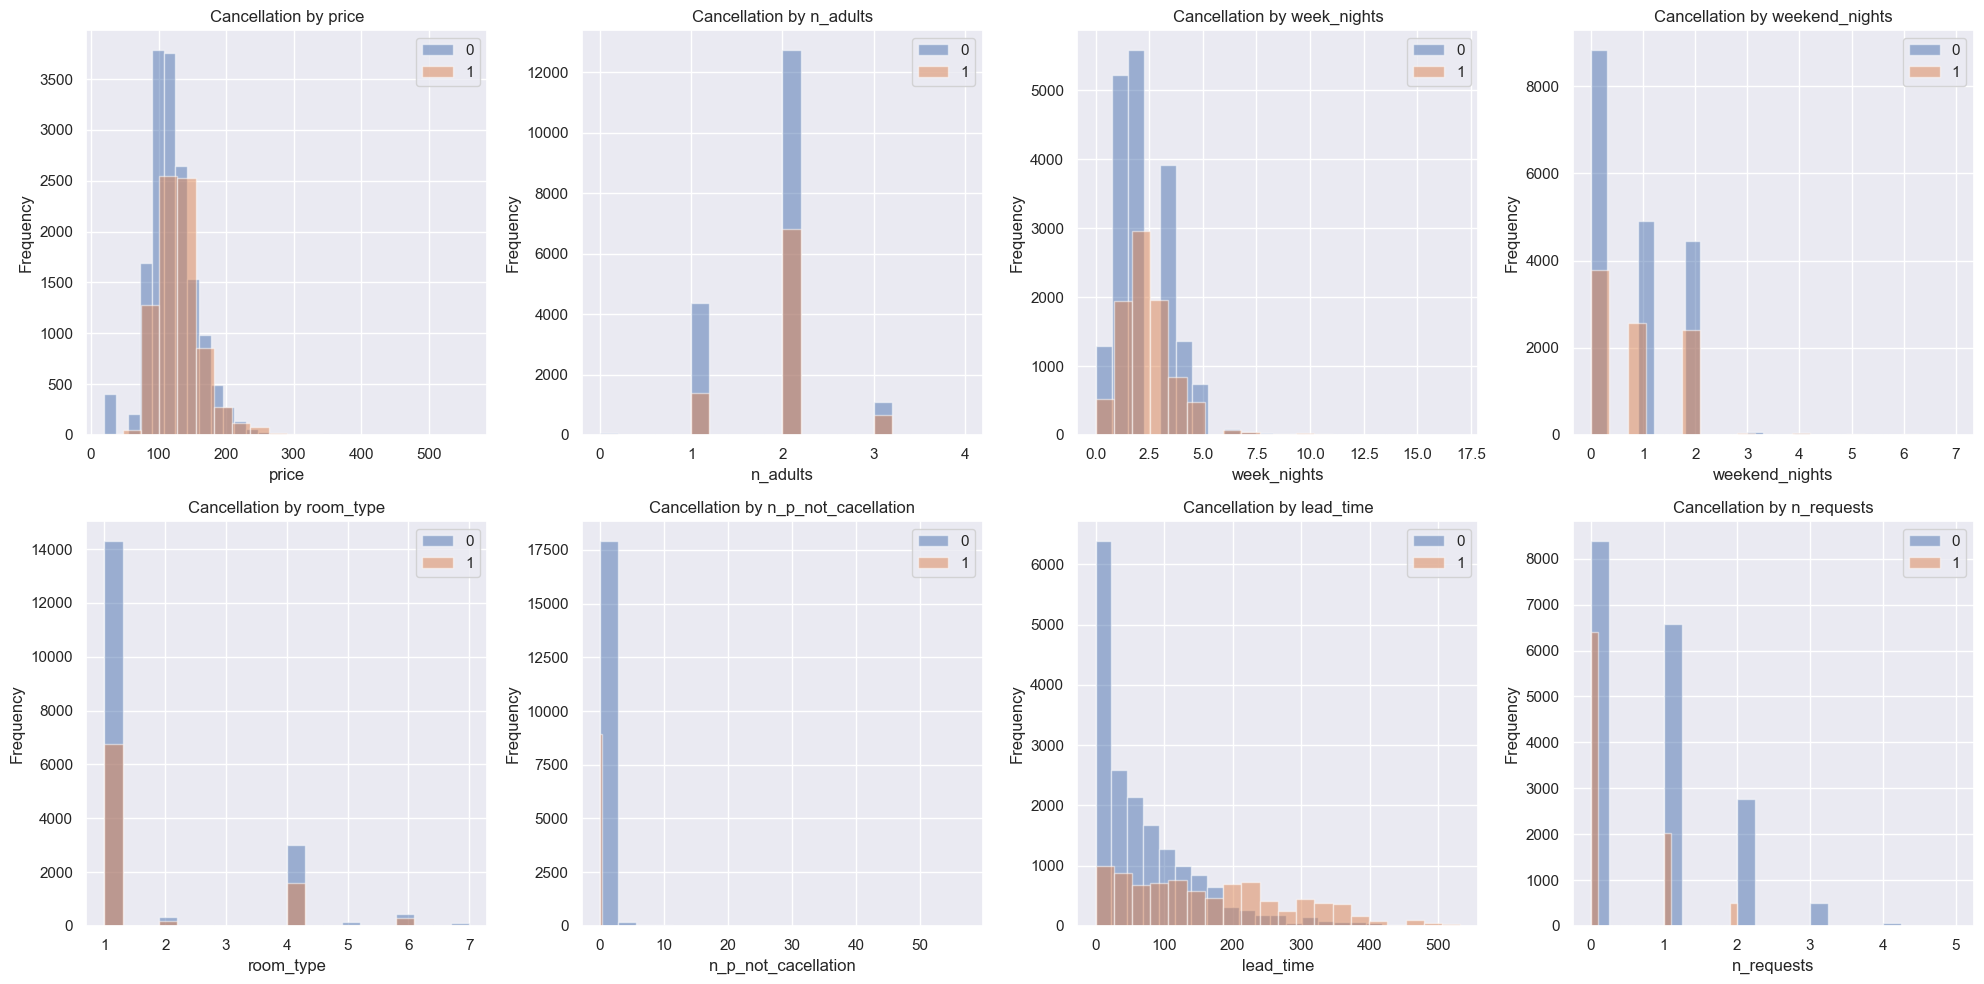

In [1271]:
columns = ['price', 'n_adults', 'week_nights', 'weekend_nights', 'room_type', 'n_p_not_cacellation', 'lead_time', 'n_requests']

# Create a figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns and plot each one in its corresponding subplot
for i, col in enumerate(columns):
    df.groupby('is_canceled')[col].plot(kind='hist', bins=20, alpha=0.5, legend=True, ax=axes[i])
    axes[i].set_title(f'Cancellation by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Scatter plot

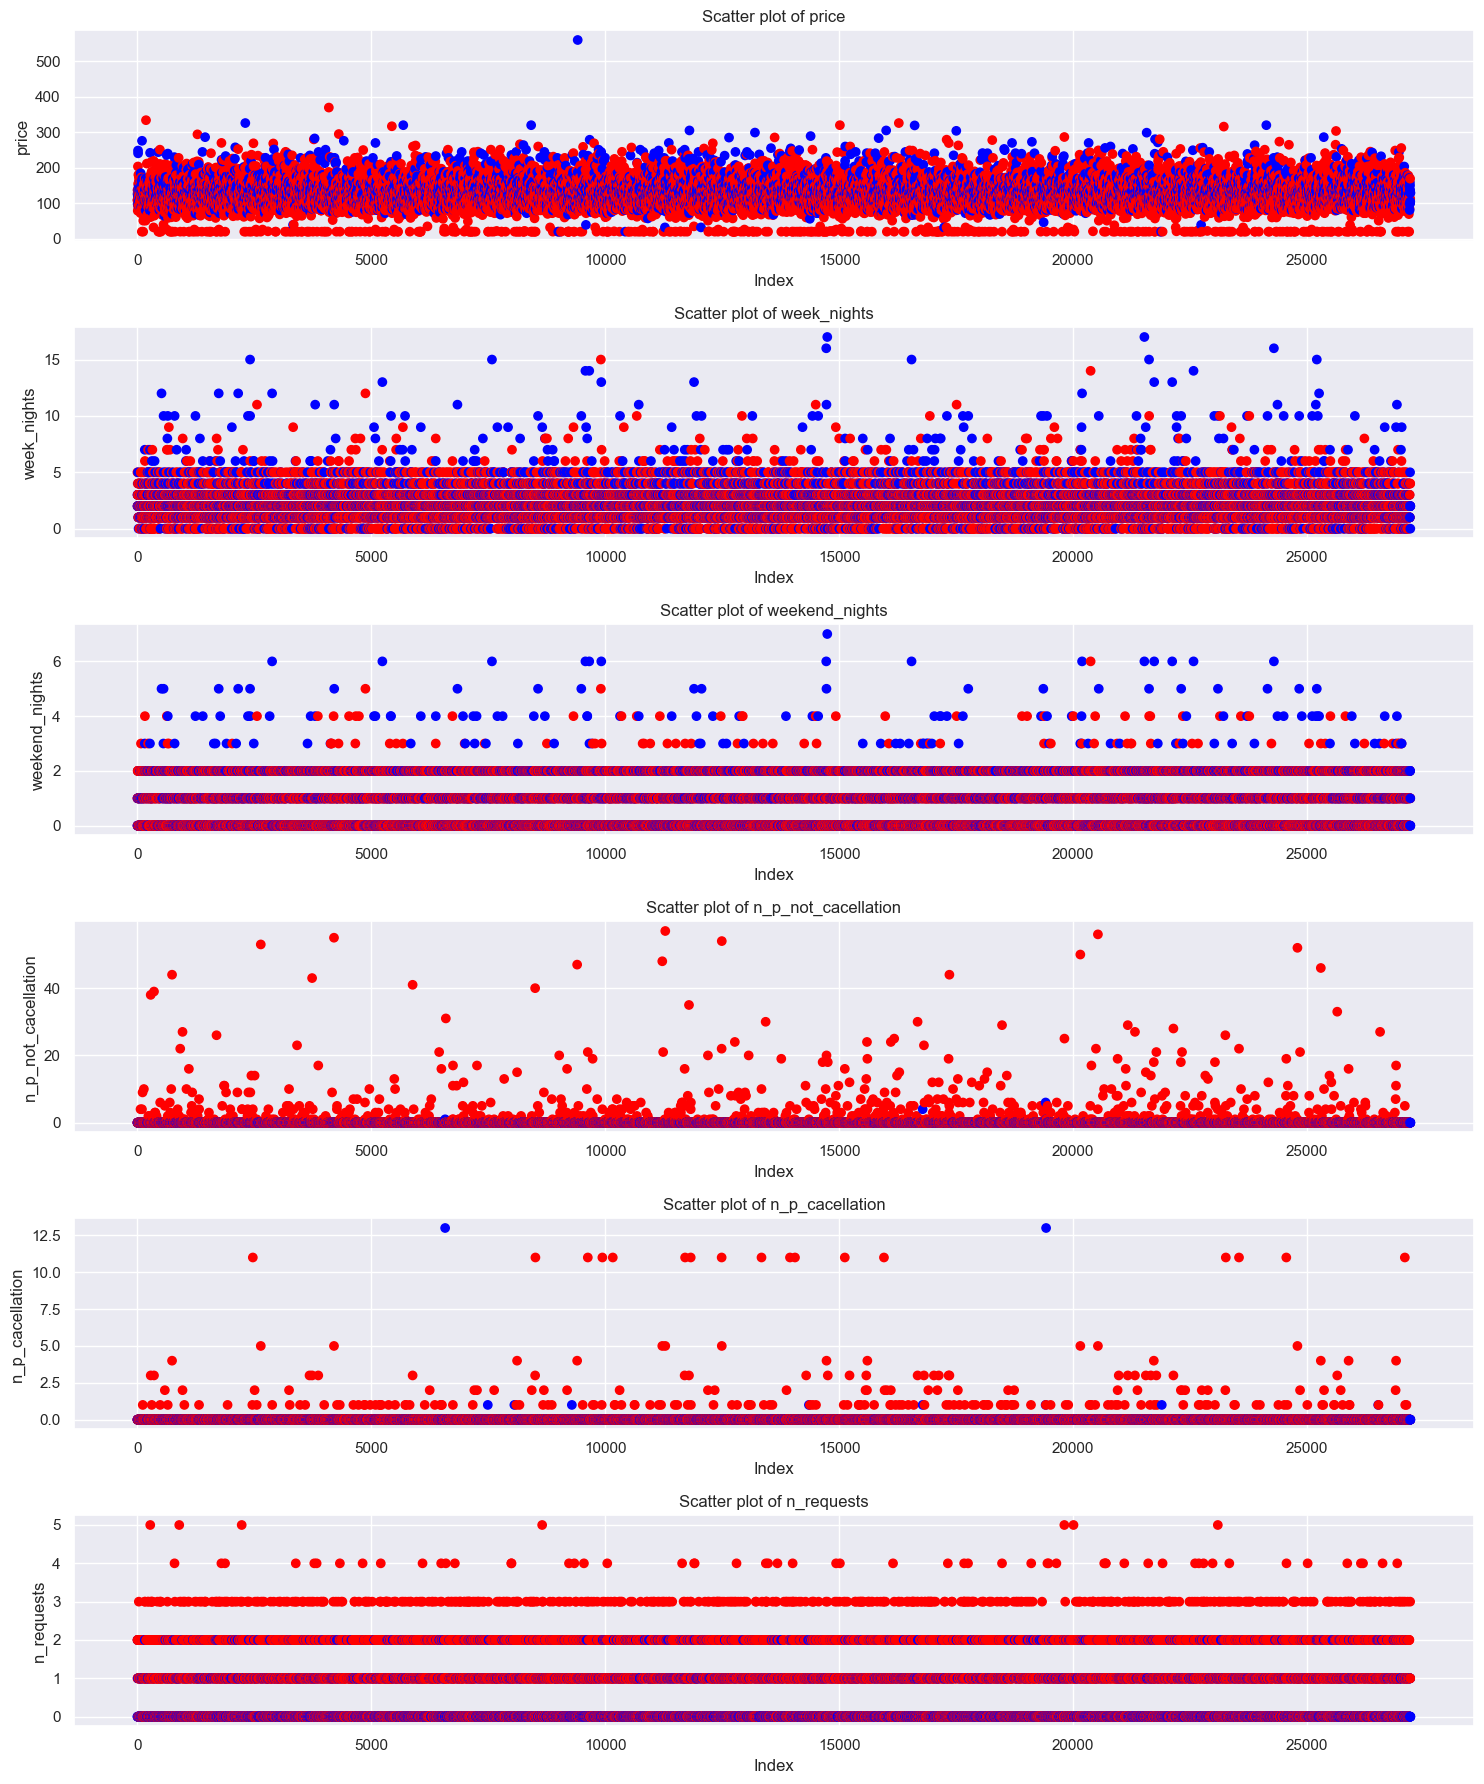

In [1272]:
colordict = {0: 'red', 1: 'blue'}
columns = ['price', 'week_nights', 'weekend_nights', 'n_p_not_cacellation', 'n_p_cacellation', 'n_requests']

# Create a large figure
plt.figure(figsize=(15, 18))

# Loop through the columns to create three subplots
for i, column in enumerate(columns, 1):
    plt.subplot(6, 1, i)
    plt.scatter(df.index, df[column], c=df['is_canceled'].map(colordict))
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.title(f'Scatter plot of {column}')

plt.tight_layout()
plt.show()

Boxplot graph 

In [1273]:
# attribute_pairs = [("price", "room_type"), ("price", "n_adults"), ("repeated", "n_p_cacellation"),
#                     ("n_p_not_cacellation", "n_p_cacellation"), ("repeated", "n_p_not_cacellation")]

# # Create a grid of subplots for each pair
# n_pairs = len(attribute_pairs)
# fig, axes = plt.subplots(1, n_pairs, figsize=(15, 5))  # Adjust figsize as needed

# # Plot boxplots for each pair
# for i, (attr_x, attr_y) in enumerate(attribute_pairs):
#     sns.boxplot(x=attr_x, y=attr_y, hue="is_canceled", data=df, palette="Set3", ax=axes[i])
#     axes[i].set_title(f"{attr_x} vs. {attr_y}")

# # Add overall title to the entire figure
# fig.suptitle("Boxplots for Correlated Attribute Pairs")

# # Adjust spacing between subplots
# plt.tight_layout()

# # Show the plot
# plt.show()

<Axes: xlabel='n_adults', ylabel='price'>

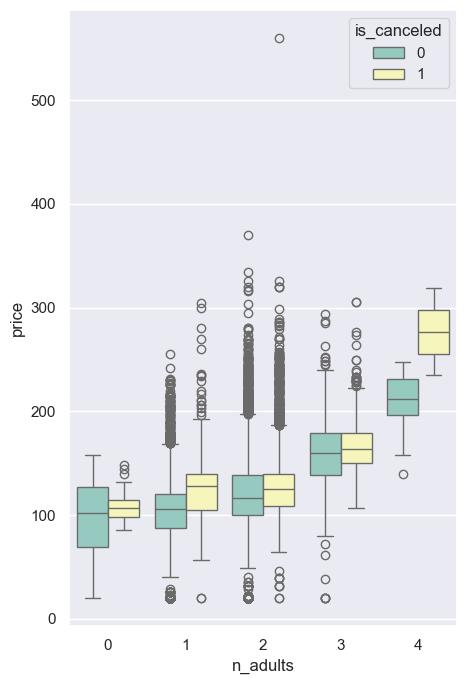

In [1274]:
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(y="price", x="n_adults", hue= "is_canceled", data=df, palette="Set3")

### 5. Data cleaning - check for each one of the problems and take care of them properly, e.g., missing values, inconsistency etc.

board_type & purchase_type: change to categorial numbering

In [1275]:
df['board_type'] = df['board_type'].fillna('not selected')
df['board_type_cat'] = df['board_type'].astype('category').cat.codes
df.groupby(['board_type','board_type_cat']).size()

board_type    board_type_cat
breakfast     0                  1753
full board    1                  2697
half board    2                 14591
not selected  3                  8172
dtype: int64

In [1276]:
# df['purchase_type'] = df['purchase_type'].fillna('Missing')
# df['purchase_type_cat'] = df['purchase_type'].astype('category').cat.codes
# df.groupby(['purchase_type','purchase_type_cat']).size()

df = pd.get_dummies(df, columns=['purchase_type', 'board_type'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           27213 non-null  object 
 1   weekend_nights               27213 non-null  int64  
 2   week_nights                  27213 non-null  int64  
 3   room_type                    27213 non-null  int32  
 4   n_adults                     27213 non-null  int64  
 5   n_less_12                    27213 non-null  int64  
 6   n_more_12                    27213 non-null  int64  
 7   booked_tour                  27213 non-null  int64  
 8   n_requests                   27213 non-null  int64  
 9   lead_time                    26794 non-null  float64
 10  n_p_cacellation              27213 non-null  int64  
 11  n_p_not_cacellation          27213 non-null  int64  
 12  repeated                     27213 non-null  int64  
 13  price           

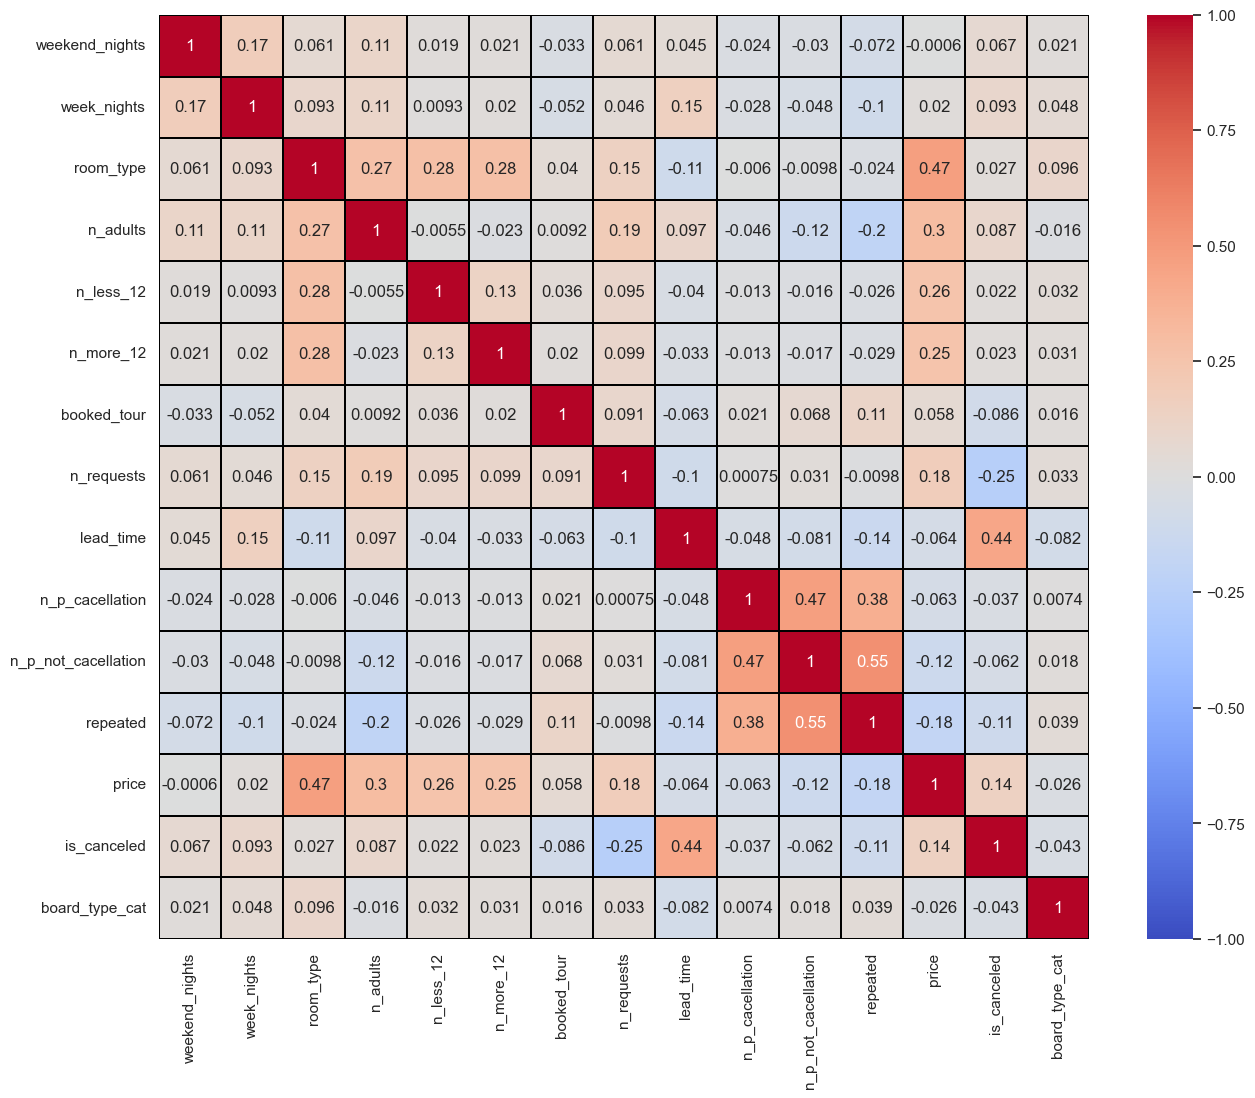

In [1277]:
f, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df[df.describe().columns].corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.2, linecolor='black')

price & lead_time: handle missing values

lead time is a continious number so we'll fill the missing values with generated numbers from its distribtuion. We look at the histogram and it seems like a exp ditribution

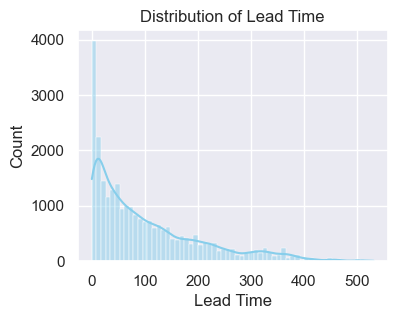

In [1278]:
plt.figure(figsize=(4, 3))
sns.histplot(data=df, x='lead_time', bins='auto', kde=True, color='skyblue')
plt.xlabel('Lead Time')
plt.ylabel('Count')
plt.title('Distribution of Lead Time')
plt.show()

In [1279]:
lead_time_mean = np.mean(df['lead_time'])
lead_time_lambda = 1 / lead_time_mean

df['lead_time_1'] = df['lead_time']
missing_rows = df['lead_time_1'].isna()
size = sum(missing_rows)

generated_values = np.random.exponential(scale=lead_time_lambda, size=size)
df.loc[missing_rows, 'lead_time_1'] = generated_values[:sum(missing_rows)]  # add missing values
df['lead_time_1'] = df['lead_time_1'].astype(int)   # change type to int

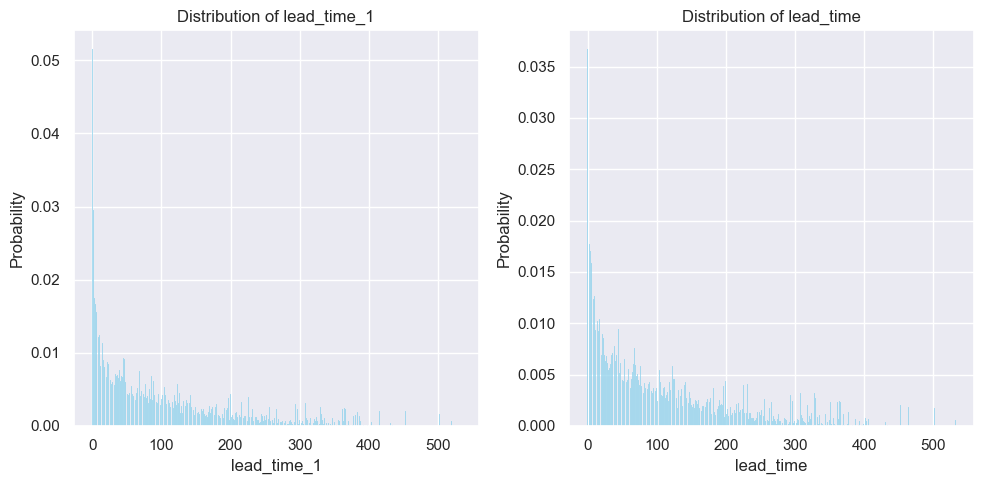

In [1280]:
# Create a large figure
plt.figure(figsize=(10, 5))

# Plot for 'lead_time_1'
plt.subplot(1, 2, 1)
sns.histplot(df['lead_time_1'], color='skyblue', stat="probability", discrete=True)
plt.xlabel('lead_time_1')
plt.title('Distribution of lead_time_1')

# Plot for 'lead_time'
plt.subplot(1, 2, 2)
sns.histplot(df['lead_time'], color='skyblue', stat="probability", discrete=True)
plt.xlabel('lead_time')
plt.title('Distribution of lead_time')

plt.tight_layout()
plt.show()

 -> we can see that we maintained the distribution

we will do the same the the 'price' attribute in 2 different way

option 1

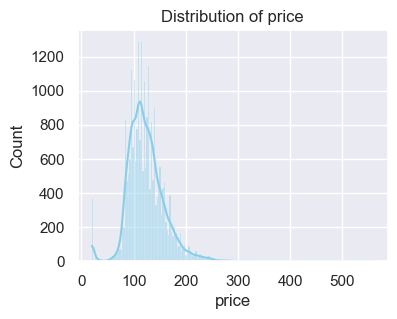

In [1281]:
plt.figure(figsize=(4, 3))
sns.histplot(data=df, x='price', bins='auto', kde=True, color='skyblue')
plt.xlabel('price')
plt.ylabel('Count')
plt.title('Distribution of price')
plt.show()

In [1282]:
mean_value = df['price'].mean() # mean
variance_value = df['price'].var()  # var

df['price_1'] = df['price']
missing_rows = df['price_1'].isna()
size = sum(missing_rows)    # number of missing values
generated_values = np.random.normal(loc=mean_value, scale=np.sqrt(variance_value), size=size)
df.loc[missing_rows, 'price_1'] = generated_values[:sum(missing_rows)]  # adding missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           27213 non-null  object 
 1   weekend_nights               27213 non-null  int64  
 2   week_nights                  27213 non-null  int64  
 3   room_type                    27213 non-null  int32  
 4   n_adults                     27213 non-null  int64  
 5   n_less_12                    27213 non-null  int64  
 6   n_more_12                    27213 non-null  int64  
 7   booked_tour                  27213 non-null  int64  
 8   n_requests                   27213 non-null  int64  
 9   lead_time                    26794 non-null  float64
 10  n_p_cacellation              27213 non-null  int64  
 11  n_p_not_cacellation          27213 non-null  int64  
 12  repeated                     27213 non-null  int64  
 13  price           

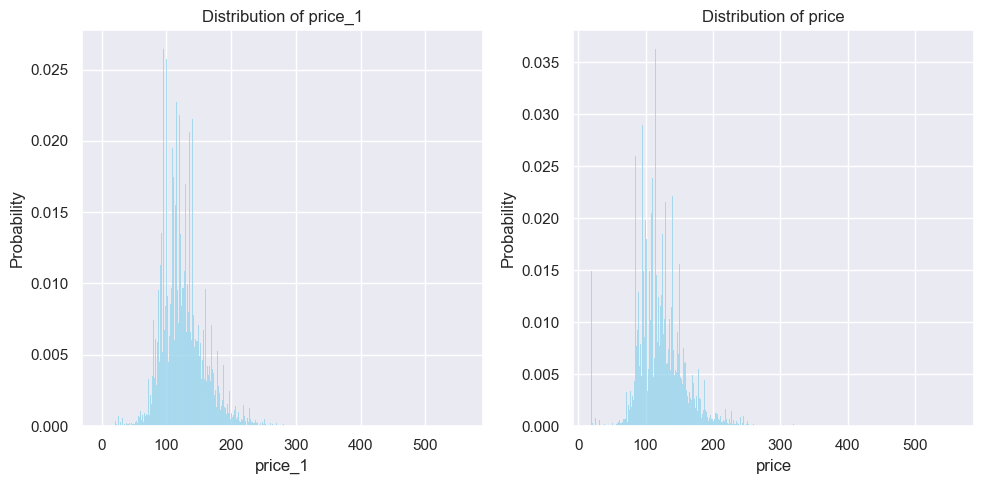

In [1283]:
# Create a large figure
plt.figure(figsize=(10, 5))

# Plot for 'price_1'
plt.subplot(1, 2, 1)
sns.histplot(df['price_1'], color='skyblue', stat="probability", discrete=True)
plt.xlabel('price_1')
plt.title('Distribution of price_1')

# Plot for 'price'
plt.subplot(1, 2, 2)
sns.histplot(df['price'], color='skyblue', stat="probability", discrete=True)
plt.xlabel('price')
plt.title('Distribution of price')

plt.tight_layout()
plt.show()

 -> we can see that we maintained the distribution

option 2 - we will use the correlation (0.47) between price and room_type

<Figure size 1000x1000 with 0 Axes>

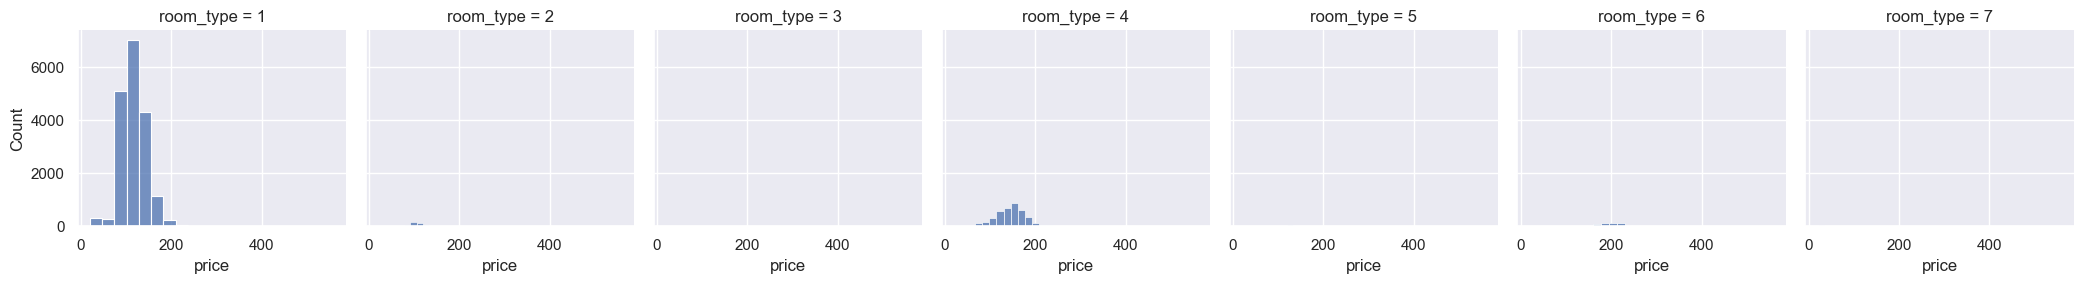

<Figure size 1000x1000 with 0 Axes>

In [1284]:
g = sns.FacetGrid(df, col="room_type")
g.map_dataframe(sns.histplot, x="price", bins=20)
plt.figure(figsize=(10, 10))

In [1285]:
for i in sorted(df['room_type'].unique()):
    print('For class ', i, ' the median is ', df.loc[df['room_type']==i , 'price'].median())
    print('For class ', i, ' the mean is ', df.loc[df['room_type']==i , 'price'].mean())
    print('and the number of missing price values is ', df.loc[df['room_type']==i , 'price'].isnull().sum(), 
          'out of ',(df['room_type']==i).sum(), 'rows \n' )

For class  1  the median is  114.5
For class  1  the mean is  115.88661138211383
and the number of missing price values is  2634 out of  21084 rows 

For class  2  the median is  105.85499999999999
For class  2  the mean is  108.92675438596491
and the number of missing price values is  55 out of  511 rows 

For class  3  the median is  100.75
For class  3  the mean is  111.91666666666667
and the number of missing price values is  0 out of  3 rows 

For class  4  the median is  147.65
For class  4  the mean is  145.5463647767185
and the number of missing price values is  585 out of  4571 rows 

For class  5  the median is  139.4
For class  5  the mean is  143.66717948717948
and the number of missing price values is  24 out of  180 rows 

For class  6  the median is  200.2
For class  6  the mean is  200.2548049921997
and the number of missing price values is  100 out of  741 rows 

For class  7  the median is  212.245
For class  7  the mean is  174.05896551724138
and the number of missin

In class 1 and 4 there are too many missing values hence we will handle them differently.

In [1286]:
df['price_2'] = df['price']
for i in [2,3,5,6,7]:
    df.loc[df['room_type']==i , 'price_2'] = df['price_2'][df['room_type']==i].fillna(value=df['price'][df['room_type']==i].median())

In [1287]:
mu_1 = df.loc[df['room_type']==1 , 'price_2'].mean()
sigma_1 = df.loc[df['room_type']==1 , 'price_2'].std()
[mu_1 , sigma_1]
mu_4 = df.loc[df['room_type']==4 , 'price_2'].mean()
sigma_4 = df.loc[df['room_type']==4 , 'price_2'].std()

In [1288]:
missing_rows = (df['room_type'] == 1) & df['price'].isnull()
df.loc[missing_rows, 'price_2'] = np.random.normal(mu_1, sigma_1, sum(missing_rows))

missing_rows = (df['room_type'] == 4) & df['price'].isnull()
df.loc[missing_rows, 'price_2'] = np.random.normal(mu_4, sigma_4, sum(missing_rows))

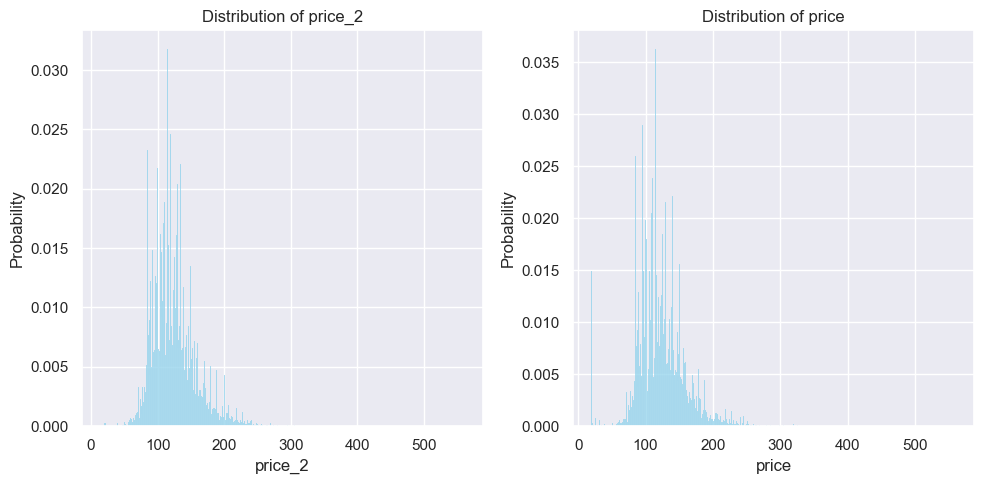

In [1289]:
# Create a large figure
plt.figure(figsize=(10, 5))

# Plot for 'price_1'
plt.subplot(1, 2, 1)
sns.histplot(df['price_2'], color='skyblue', stat="probability", discrete=True)
plt.xlabel('price_2')
plt.title('Distribution of price_2')

# Plot for 'price'
plt.subplot(1, 2, 2)
sns.histplot(df['price'], color='skyblue', stat="probability", discrete=True)
plt.xlabel('price')
plt.title('Distribution of price')

plt.tight_layout()
plt.show()

 -> we can see that we maintained the distribution

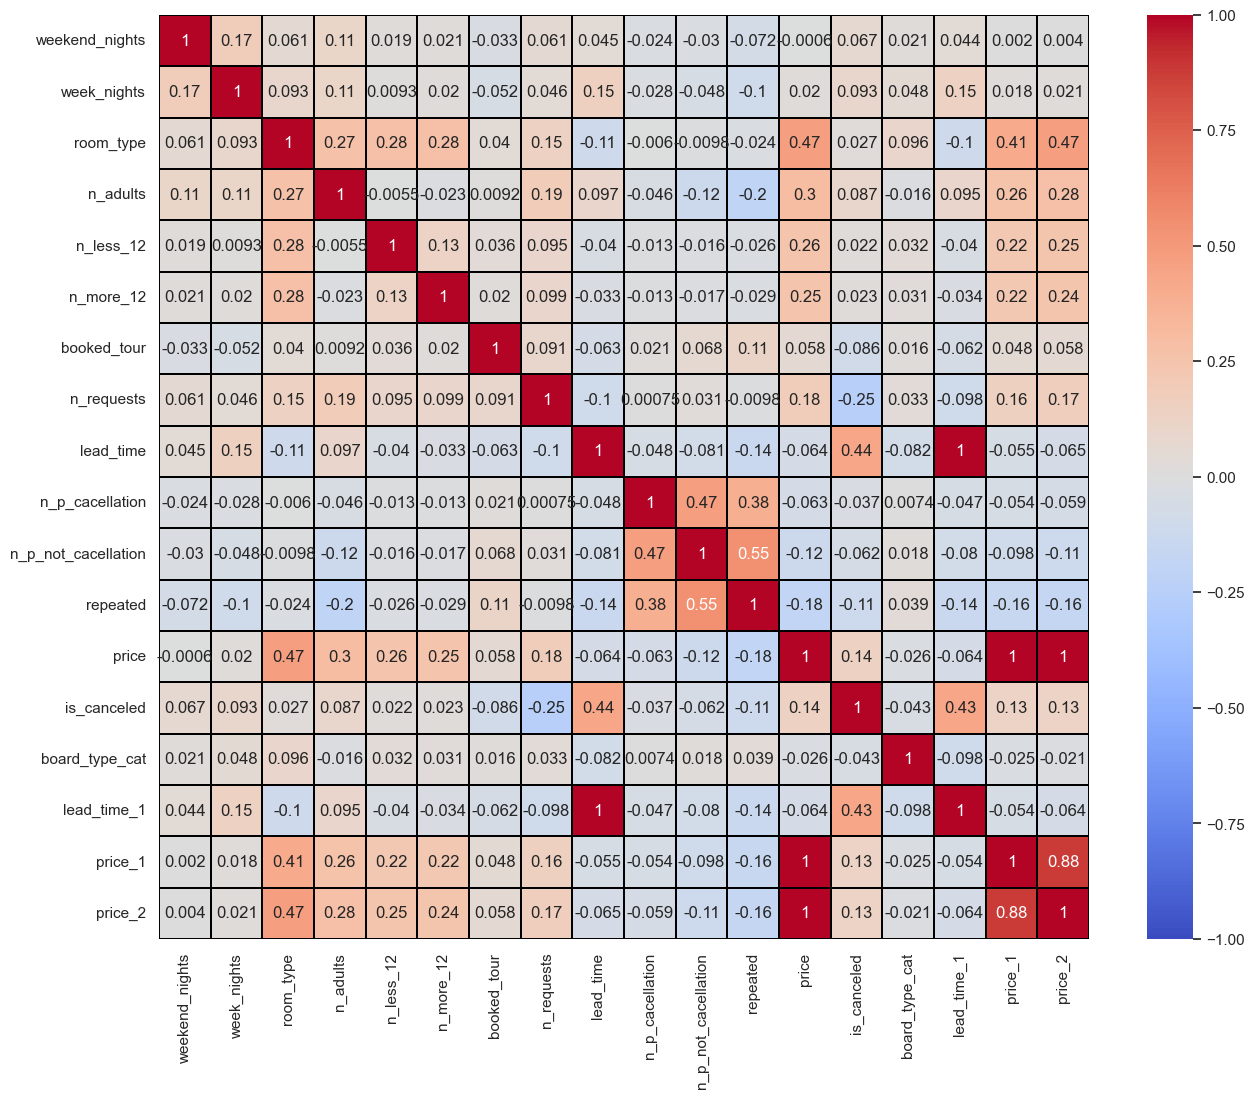

In [1290]:
f, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df[df.describe().columns].corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.2, linecolor='black')

-> we can see that price_2 preserved the correlation between the features in a better way then price_1

In [1291]:
df['price'] = df['price_2'].astype(int)
df['lead_time'] = df['lead_time_1']
df = df.drop(columns=['price_1', 'price_2', 'lead_time_1'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           27213 non-null  object
 1   weekend_nights               27213 non-null  int64 
 2   week_nights                  27213 non-null  int64 
 3   room_type                    27213 non-null  int32 
 4   n_adults                     27213 non-null  int64 
 5   n_less_12                    27213 non-null  int64 
 6   n_more_12                    27213 non-null  int64 
 7   booked_tour                  27213 non-null  int64 
 8   n_requests                   27213 non-null  int64 
 9   lead_time                    27213 non-null  int32 
 10  n_p_cacellation              27213 non-null  int64 
 11  n_p_not_cacellation          27213 non-null  int64 
 12  repeated                     27213 non-null  int64 
 13  price                        27

Inconsistencies - During the data analysis we noticed that in 27 places in the data there is an illogical date. We changed the nonsensical date everywhere it appeared to the date closest to it. and that how we handled the inconsitences
Split 'date' column to day, month, year:

In [1292]:
df.loc[df['date'] == '2018-2-29', 'date'] = '03/01/2018'

#### Outliers

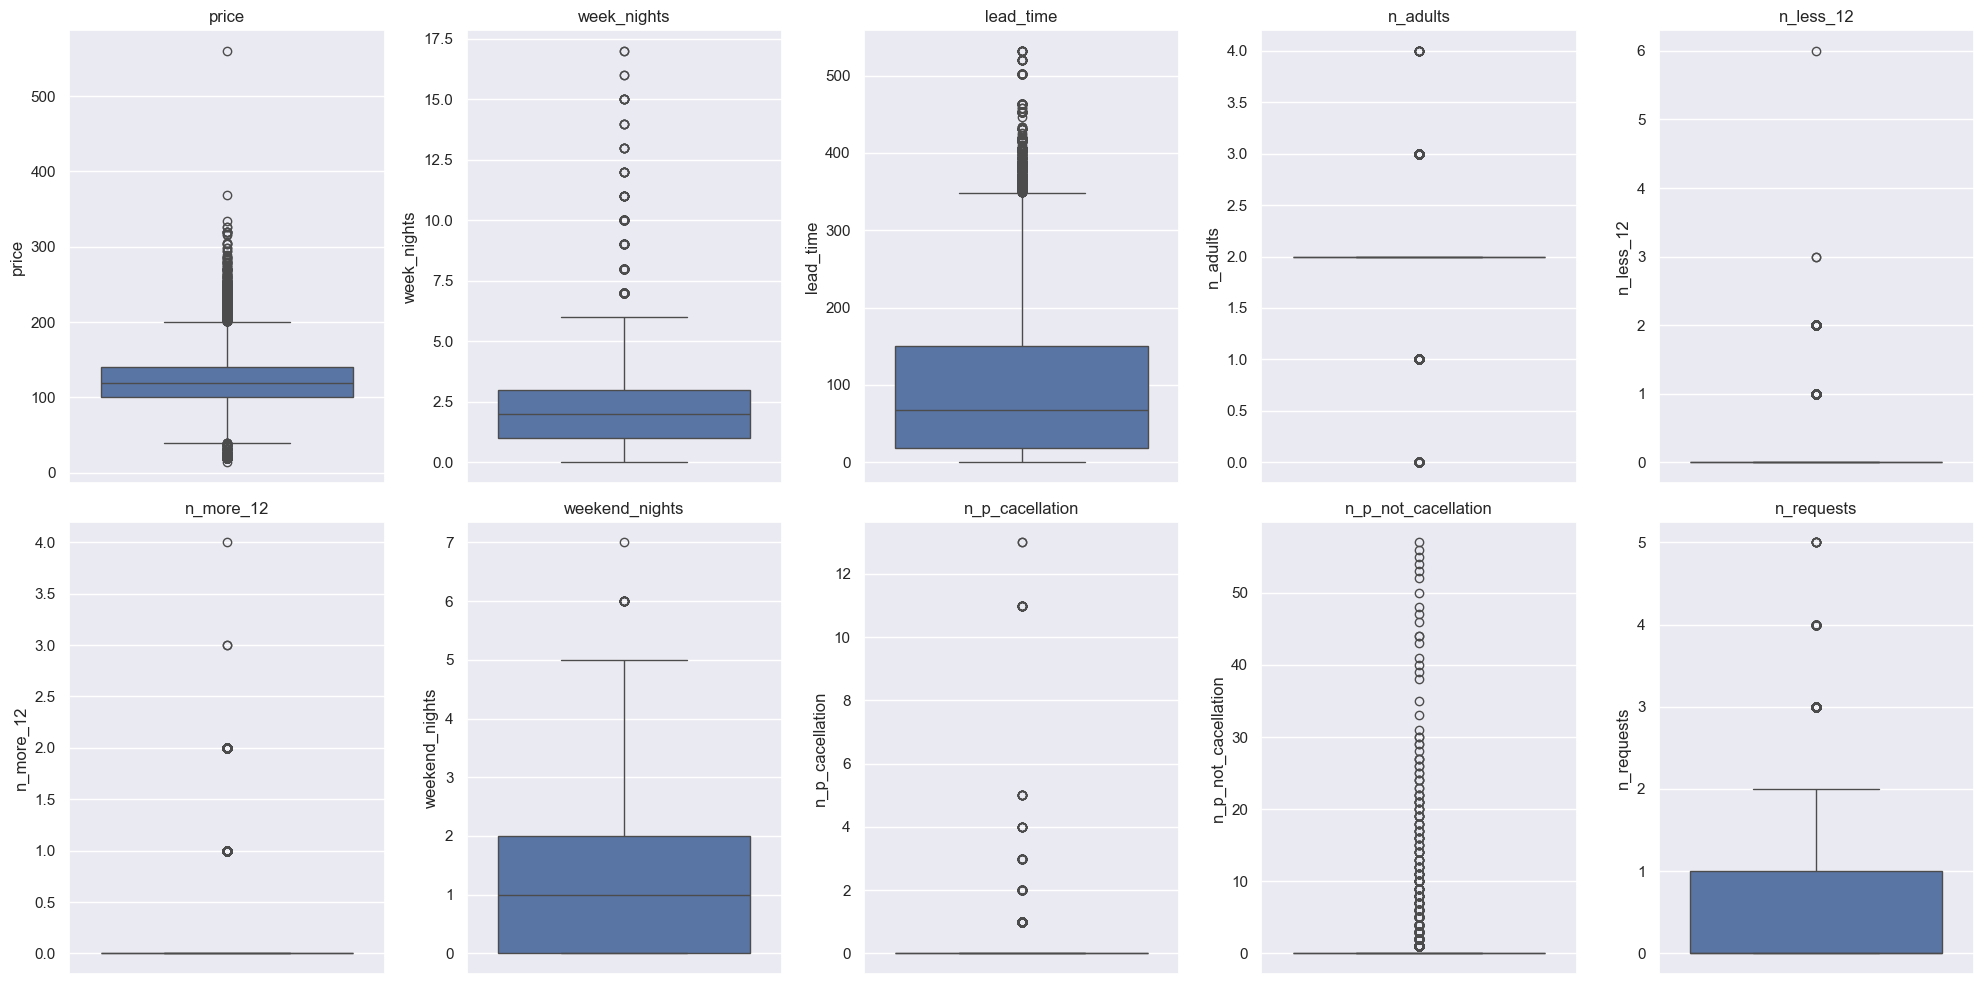

In [1293]:

columns = ['price', 'week_nights', 'lead_time', 'n_adults', 'n_less_12', 'n_more_12', 'weekend_nights', 'n_p_cacellation', 'n_p_not_cacellation', 'n_requests']

# Create a figure with two rows and five columns
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Iterate through the columns and plot each one in its corresponding subplot
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=df, ax=axes[i // 5, i % 5])  # Adjusting the indexing here
    axes[i // 5, i % 5].set_title(col)  # add title for each subplot

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [1294]:
# columns = ['price', 'week_nights', 'lead_time', 'weekend_nights', 'n_requests']

# for col in columns:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Filter out outliers
#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [1295]:
print('min:', numeric_data['price'].min())
print('max:', numeric_data['price'].max())
print('values over 350:', numeric_data[numeric_data['price']>350].shape[0])
print('values under 10:', numeric_data[numeric_data['price']<30].shape[0])

min: 20.0
max: 560.0
values over 350: 2
values under 10: 395


numeric outliers

In [1296]:
data_mean = df['price'].mean()
data_std = df['price'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
len(df.loc[(df['price'] > upper_bound) | (df['price'] < lower_bound)])

250

deleting the price outliers

In [1297]:
df = df.loc[(df['price'] <= upper_bound) & (df['price'] >= lower_bound)]
df.info()                                    

<class 'pandas.core.frame.DataFrame'>
Index: 26963 entries, 0 to 27212
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           26963 non-null  object
 1   weekend_nights               26963 non-null  int64 
 2   week_nights                  26963 non-null  int64 
 3   room_type                    26963 non-null  int32 
 4   n_adults                     26963 non-null  int64 
 5   n_less_12                    26963 non-null  int64 
 6   n_more_12                    26963 non-null  int64 
 7   booked_tour                  26963 non-null  int64 
 8   n_requests                   26963 non-null  int64 
 9   lead_time                    26963 non-null  int32 
 10  n_p_cacellation              26963 non-null  int64 
 11  n_p_not_cacellation          26963 non-null  int64 
 12  repeated                     26963 non-null  int64 
 13  price                        26963 n

categorial outliers

In [1298]:
for column_name in df.columns:
    unique_count = df[column_name].nunique()
    print(column_name + ": " + str(unique_count))

ID: 26963
weekend_nights: 8
week_nights: 18
room_type: 7
n_adults: 5
n_less_12: 5
n_more_12: 5
booked_tour: 2
n_requests: 6
lead_time: 350
n_p_cacellation: 8
n_p_not_cacellation: 50
repeated: 2
price: 201
date: 552
is_canceled: 2
board_type_cat: 4
purchase_type_Complementary: 2
purchase_type_Corporate: 2
purchase_type_Offline: 2
purchase_type_Online: 2
board_type_full board: 2
board_type_half board: 2
board_type_not selected: 2


In [1299]:
cat_col = ['weekend_nights', 'n_adults', 'n_more_12','n_less_12', 'n_requests', 'room_type', 'booked_tour', 'n_p_cacellation', 'n_p_not_cacellation', 'repeated']
for column_name in cat_col:
    value_counts = df[column_name].value_counts()
    print(f"Value counts for '{column_name}':\n{value_counts}\n")

Value counts for 'weekend_nights':
weekend_nights
0    12487
1     7437
2     6800
3      114
4       86
5       23
6       15
7        1
Name: count, dtype: int64

Value counts for 'n_adults':
n_adults
2    19376
1     5762
3     1713
0      104
4        8
Name: count, dtype: int64

Value counts for 'n_more_12':
n_more_12
0    25914
1      813
2      233
3        2
4        1
Name: count, dtype: int64

Value counts for 'n_less_12':
n_less_12
0    25885
1      850
2      225
3        2
6        1
Name: count, dtype: int64

Value counts for 'n_requests':
n_requests
0    14678
1     8524
2     3197
3      503
4       55
5        6
Name: count, dtype: int64

Value counts for 'room_type':
room_type
1    21057
4     4529
6      617
2      505
5      174
7       78
3        3
Name: count, dtype: int64

Value counts for 'booked_tour':
booked_tour
0    26122
1      841
Name: count, dtype: int64

Value counts for 'n_p_cacellation':
n_p_cacellation
0     26709
1       154
2        37
3        27

deleting the outliers

In [1300]:
cat_col_under_50_20 = ['weekend_nights', 'n_adults', 'n_more_12', 'n_less_12', 'n_requests', 'room_type', 'n_p_cacellation']
for column_name in cat_col_under_50_20:
    # we removing all the rows that has unique value with less than 50 apperances overall
    if column_name == 'n_p_cacellation':
        thres = 20
    else:
        thres = 50
    value_counts = df[column_name].value_counts()
    unique_values_to_keep = value_counts[value_counts >= thres].index
    df = df[df[column_name].isin(unique_values_to_keep)]
    value_counts = df[column_name].value_counts()
    print(f"Value counts for '{column_name}':\n{value_counts}\n")

Value counts for 'weekend_nights':
weekend_nights
0    12487
1     7437
2     6800
3      114
4       86
Name: count, dtype: int64

Value counts for 'n_adults':
n_adults
2    19363
1     5737
3     1712
0      104
Name: count, dtype: int64

Value counts for 'n_more_12':
n_more_12
0    25868
1      813
2      232
Name: count, dtype: int64

Value counts for 'n_less_12':
n_less_12
0    25837
1      849
2      225
Name: count, dtype: int64

Value counts for 'n_requests':
n_requests
0    14650
1     8510
2     3187
3      503
4       55
Name: count, dtype: int64

Value counts for 'room_type':
room_type
1    21023
4     4518
6      614
2      503
5      172
7       72
Name: count, dtype: int64

Value counts for 'n_p_cacellation':
n_p_cacellation
0    26648
1      154
2       37
3       27
Name: count, dtype: int64



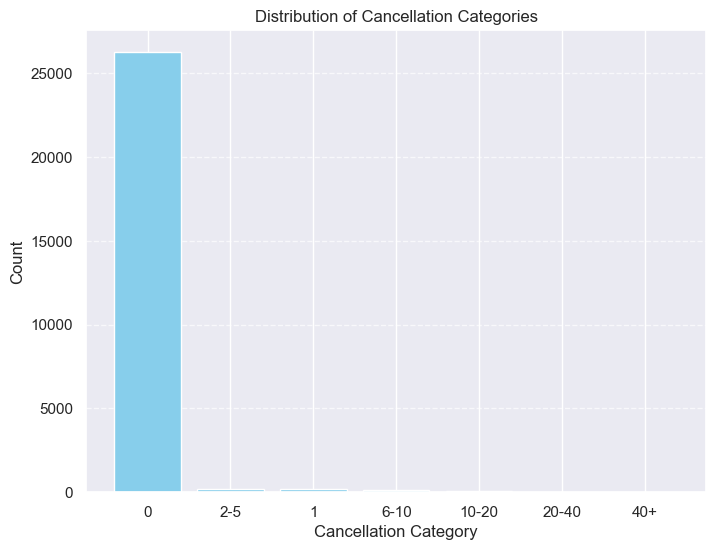

In [1301]:
bin_edges = [0, 1, 2, 5, 10, 20, 40, float('inf')]
bin_labels = ['0', '1', '2-5', '6-10', '10-20', '20-40', '40+']

# Create a new column with the category labels
df['n_p_not_cacellation_bins'] = pd.cut(df['n_p_not_cacellation'], bins=bin_edges, labels=bin_labels, right=False)
category_counts = df['n_p_not_cacellation_bins'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


### 6. If necessary, add and/or delete attributes

-> we will delete the ID since it doesnt give as any information

In [1302]:
# delete ID attribute
df.drop(columns=['ID'], inplace=True)
print("Dropped the ID feature")

Dropped the ID feature


In [1303]:
df[["month", "day", "year"]] = df["date"].str.split("/", expand=True)
df["year"] = df["year"].str.extract('(\d+\.?\d*)', expand = True).astype(int)
df["month"] = df["month"].str.extract('(\d+\.?\d*)', expand = True).astype(int)
df["day"] = df["day"].str.extract('(\d+\.?\d*)', expand = True).astype(int)
ind_to_rem = df[(df['year'] != 2018) & (df['year'] != 2017)].index
df = df.drop(index=ind_to_rem, axis = 0)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mayan\AppData\Local\Temp\ipykernel_26056\2680328192.py:2: SyntaxWarning: invalid escape sequence '\d'
  df["year"] = df["year"].str.extract('(\d+\.?\d*)', expand = True).astype(int)
C:\Users\mayan\AppData\Local\Temp\ipykernel_26056\2680328192.py:3: SyntaxWarning: invalid escape sequence '\d'
  df["month"] = df["month"].str.extract('(\d+\.?\d*)', expand = True).astype(int)
C:\Users\mayan\AppData\Local\Temp\ipykernel_26056\2680328192.py:4: SyntaxWarning: invalid escape sequence '\d'
  df["day"] = df["day"].str.extract('(\d+\.?\d*)', expand = True).astype(int)


In [1304]:
df['family_size'] = df['n_adults'] + df['n_more_12'] + df['n_less_12']

In [1305]:
columns_to_drop = [ 'date', 'n_p_not_cacellation_bins', 'n_more_12', 'n_adults', 'n_less_12']
df = df.drop(columns=columns_to_drop, axis = 1)

In [1306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26864 entries, 0 to 27212
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   weekend_nights               26864 non-null  int64
 1   week_nights                  26864 non-null  int64
 2   room_type                    26864 non-null  int32
 3   booked_tour                  26864 non-null  int64
 4   n_requests                   26864 non-null  int64
 5   lead_time                    26864 non-null  int32
 6   n_p_cacellation              26864 non-null  int64
 7   n_p_not_cacellation          26864 non-null  int64
 8   repeated                     26864 non-null  int64
 9   price                        26864 non-null  int32
 10  is_canceled                  26864 non-null  int64
 11  board_type_cat               26864 non-null  int8 
 12  purchase_type_Complementary  26864 non-null  bool 
 13  purchase_type_Corporate      26864 non-null  bool 


### 7. Data transformation - apply the appropriate methods to the required attributes, e.g., normalization, discretization etc

In [1307]:
# min max norm for price
columns = ['price']
for column in columns:
    scaler = MinMaxScaler()
    scaler.fit(pd.DataFrame(df[column]))
    df[column+'_min_max'] = scaler.transform(pd.DataFrame(df[column]))
    print('Min - max normalization of '+column+':')
    print('\tMin value: '+str(scaler.data_min_))
    print('\tMax value: '+str(scaler.data_max_))
    print('\tdf.head() of ' + column+':')
    print(df[[column,column+'_min_max']].head())
    print()


Min - max normalization of price:
	Min value: [20.]
	Max value: [228.]
	df.head() of price:
   price  price_min_max
0    108       0.423077
1     52       0.153846
2    137       0.562500
3    127       0.514423
4    110       0.432692



0   -0.656313
1    2.535577
2    0.443009
3    3.856692
4   -0.675599
Name: lead_time_norm, dtype: float64


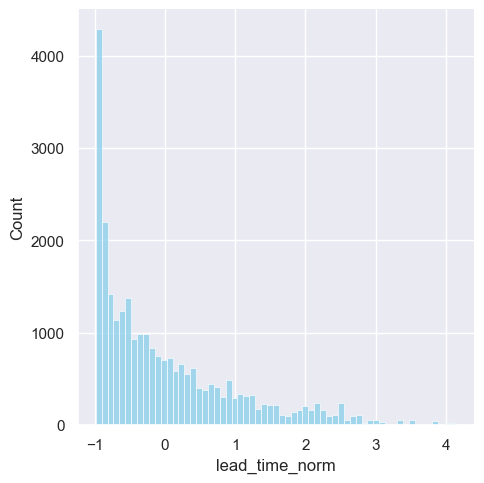

In [1308]:
# z score norm for price
from sklearn.preprocessing import StandardScaler
z_scaler = StandardScaler()
z_scaler.fit(pd.DataFrame(df['lead_time']))
df['lead_time_norm'] = z_scaler.transform(pd.DataFrame(df['lead_time']))
print(df['lead_time_norm'].head())
sns.displot(df['lead_time_norm'], color='skyblue')

In [1309]:
df = df.drop('price',axis=1)

In [1310]:
df = df.drop('lead_time',axis=1)

### 8. Implement the pre-process on the attached test dataset and describe what adjustments you made

### 9. Split the data to train and validation set and use cross-validation method.

In [1311]:
X = df.drop('is_canceled', axis = 1)
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

tree classifier

In [1312]:
# Create Decision Tree classifier object
dt = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                          max_depth=15, min_samples_split=5, min_samples_leaf=10, random_state=42)

# Train Decision Tree Classifier 
dt = dt.fit(X_train,y_train)

# Predict the label
y_pred = dt.predict(X_test)

# Evaluate the model's performance
tree_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"\ndecision tree accuracy: {tree_accuracy}")
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))




decision tree accuracy: 0.8544574725479248


0     1
0  3346   303
1   479  1245

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      3649
           1       0.80      0.72      0.76      1724

    accuracy                           0.85      5373
   macro avg       0.84      0.82      0.83      5373
weighted avg       0.85      0.85      0.85      5373



Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}
Fitting 5 folds for each of 100 candidates, totalling 500 fits

The best parameters are: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 10}

Optimized decision tree accuracy: 0.8516657360878467


0     1
0  3330   319
1   478  1246

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3649
           1       0.80      0.72      0.76      1724

    accuracy                           0.85      5373
   macro avg       0.84      0.82      0.83      5373
weighted avg       0.85      0.85      0.85      5373

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.804 to fit



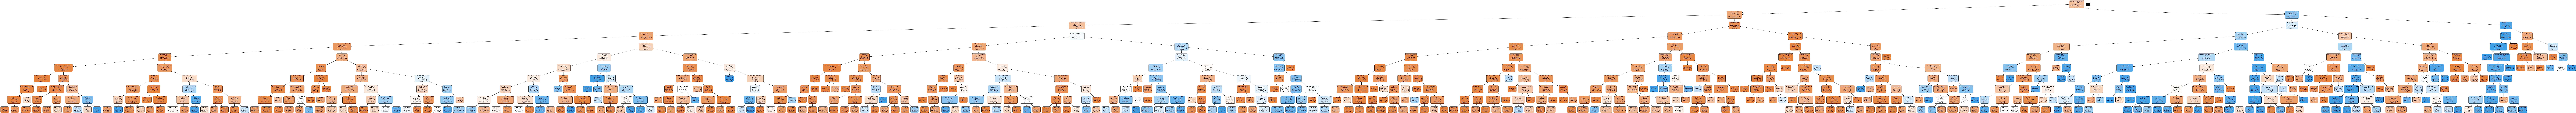

In [1313]:
dt = DecisionTreeClassifier(random_state=42)
print('Parameters currently in use:\n')
pprint(dt.get_params())

max_features = [ None, 5, 7, 10]

max_depth = [None, 5, 10, 15, 20 ]

min_samples_split = [2, 5, 10, 15]

min_samples_leaf = [1, 5, 10, 15]

random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}


dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = 5,
                                verbose=2, random_state = 42, n_jobs = -1)


dt.fit(X_train, y_train)
dt_random.fit(X_train, y_train)
print(f"\nThe best parameters are: {dt_random.best_params_}")


# Get the best parameters
best_params = dt_random.best_params_
# Create a new decision tree with the best parameters
best_tree = DecisionTreeClassifier(**best_params, random_state=42)
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)

# Evaluate the model's performance
OPT_tree_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"\nOptimized decision tree accuracy: {OPT_tree_accuracy}")
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))

dot = export_graphviz(best_tree, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

In [1314]:
print('decision tree accuracy: {:0.2f}%'.format(tree_accuracy*100))
print('Optimized decision tree accuracy: {:0.2f}%'.format(OPT_tree_accuracy*100))

# Calculate improvement
improvement = 100 * (OPT_tree_accuracy - tree_accuracy) / tree_accuracy
print('Improvement: {:0.2f}%'.format(improvement))

decision tree accuracy: 85.45%
Optimized decision tree accuracy: 85.17%
Improvement: -0.33%


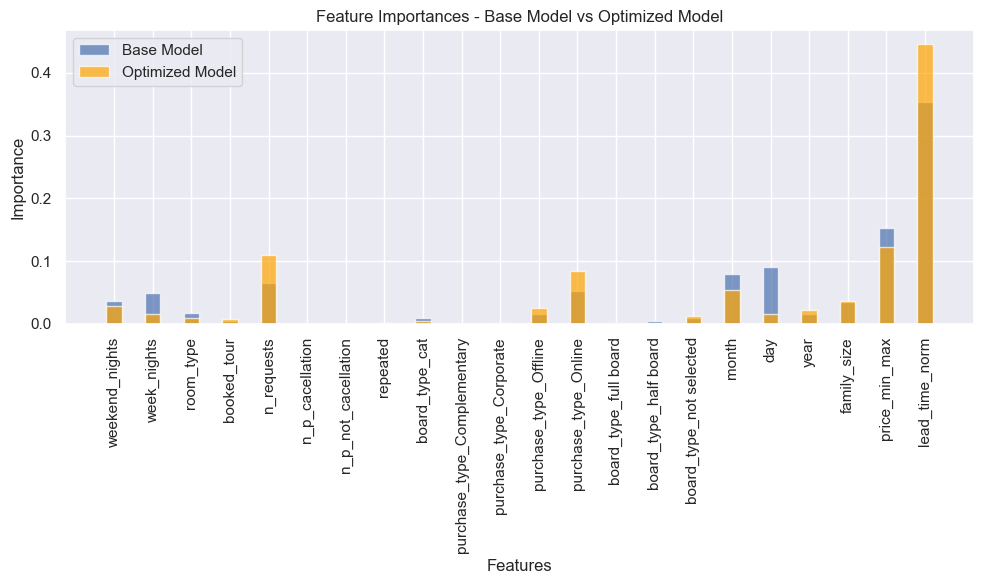

In [1315]:
# Extract feature importances from both models
base_importances = dt.feature_importances_
optimized_importances = best_tree.feature_importances_

# Create a bar plot to visualize feature importances
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(base_importances))
bar_width = 0.4

ax.bar(x, base_importances, label='Base Model', width=bar_width, alpha=0.7)
ax.bar(x, optimized_importances, label='Optimized Model', width=bar_width, alpha=0.7, color='orange')

ax.set_xticks(x)
ax.set_xticklabels(X.columns, rotation=90)
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances - Base Model vs Optimized Model')
ax.legend()

# Show the improvement percentage below the plot
plt.tight_layout()
plt.show()


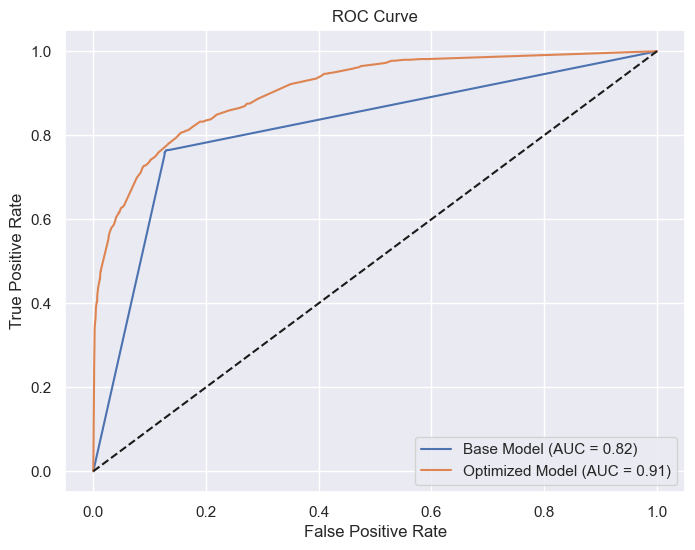

In [1316]:
# Get predicted probabilities for the positive class (class 1)
base_proba = dt.predict_proba(X_test)[:, 1]

random_proba = best_tree.predict_proba(X_test)[:, 1]

# Calculate AUC scores
base_auc = roc_auc_score(y_test, base_proba)
random_auc_dt = roc_auc_score(y_test, random_proba)

# Create ROC curves
base_fpr, base_tpr, _ = roc_curve(y_test, base_proba)
random_fpr_dt, random_tpr_dt, _ = roc_curve(y_test, random_proba)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(base_fpr, base_tpr, label='Base Model (AUC = {:.2f})'.format(base_auc))
plt.plot(random_fpr_dt, random_tpr_dt, label='Optimized Model (AUC = {:.2f})'.format(random_auc_dt))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



Random Forest

In [1317]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model's performance
forest_accuracy=metrics.accuracy_score(y_test, y_pred)
print(f"\nrandom forest accuracy: {forest_accuracy}")
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))


random forest accuracy: 0.8777219430485762


0     1
0  3437   212
1   445  1279

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      3649
           1       0.86      0.74      0.80      1724

    accuracy                           0.88      5373
   macro avg       0.87      0.84      0.85      5373
weighted avg       0.88      0.88      0.88      5373



In [1318]:
rf = RandomForestClassifier(random_state=42)
print('Parameters currently in use:\n')
pprint(rf.get_params())

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]

max_features = [ 2, 5, 7, 10]

max_depth = [None, 2, 5, 7, 9 ]

min_samples_split = [2, 10, 15]

min_samples_leaf = [1, 3, 5, 10]

max_samples = [0.1, 0.3, 0.5, 0.7, None]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_samples': max_samples}
# pprint(random_grid)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5,
                                verbose=2, random_state = 42, n_jobs = -1)

rf.fit(X_train, y_train)
rf_random.fit(X_train, y_train)
print(f"\nThe best parameters are: {rf_random.best_params_}")


# Get the best parameters
best_params = rf_random.best_params_
# Create a new RandomForestClassifier with the best parameters
best_random = RandomForestClassifier(**best_params, random_state=42)
best_random.fit(X_train, y_train)
y_pred = best_random.predict(X_test)

# Evaluate the model's performance
OPT_forest_accuracy=metrics.accuracy_score(y_test, y_pred)
print(f"\nOptimized random forest accuracy: {OPT_forest_accuracy}")
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
Fitting 5 folds for each of 100 candidates, totalling 500 fits

The best parameters are: {'n_estimators': 157, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_samples': 0.5, 'max_features': 10, 'max_depth': None}

Optimized random forest accuracy: 0.8829331844407221


0     1
0  3449   200
1   429  1295

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3649
           1       0.87      0.75      0.80      1724

    accuracy                           0.88      5373
   macro avg       0.88      0.85      0.86      5373
weighted avg       0.88      0.88      0.88      5373



In [1319]:
print('random forest accuracy: {:0.2f}%'.format(forest_accuracy*100))
print('Optimized random forest accuracy: {:0.2f}%'.format(OPT_forest_accuracy*100))

# Calculate improvement
improvement = 100 * (OPT_forest_accuracy - forest_accuracy) / forest_accuracy
print('Improvement: {:0.2f}%'.format(improvement))

random forest accuracy: 87.77%
Optimized random forest accuracy: 88.29%
Improvement: 0.59%


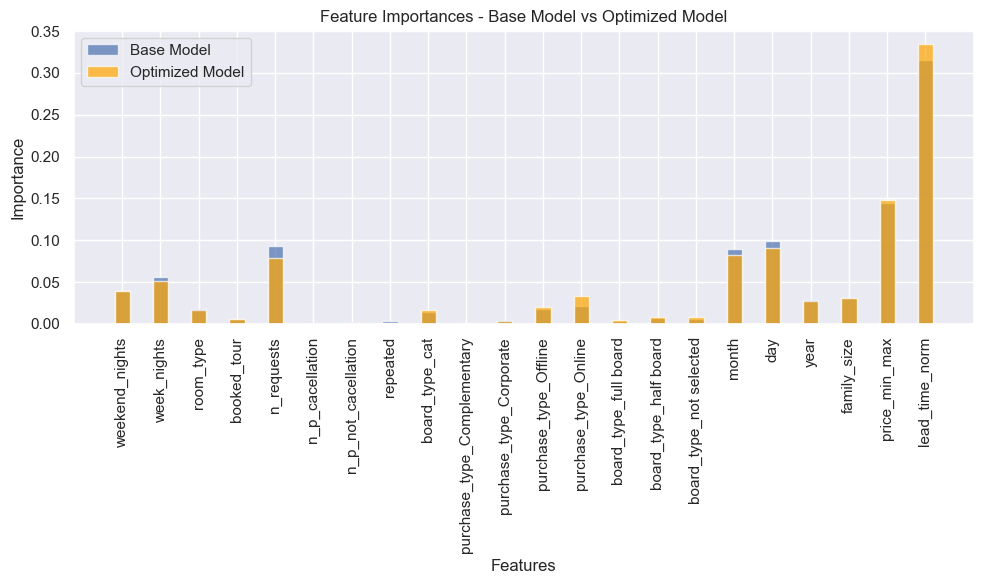

In [1320]:
# Extract feature importances from both models
base_importances = rf.feature_importances_
optimized_importances = best_random.feature_importances_

# Create a bar plot to visualize feature importances
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(base_importances))
bar_width = 0.4

ax.bar(x, base_importances, label='Base Model', width=bar_width, alpha=0.7)
ax.bar(x, optimized_importances, label='Optimized Model', width=bar_width, alpha=0.7, color='orange')

ax.set_xticks(x)
ax.set_xticklabels(X.columns, rotation=90)
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances - Base Model vs Optimized Model')
ax.legend()

# Show the improvement percentage below the plot
plt.tight_layout()
plt.show()


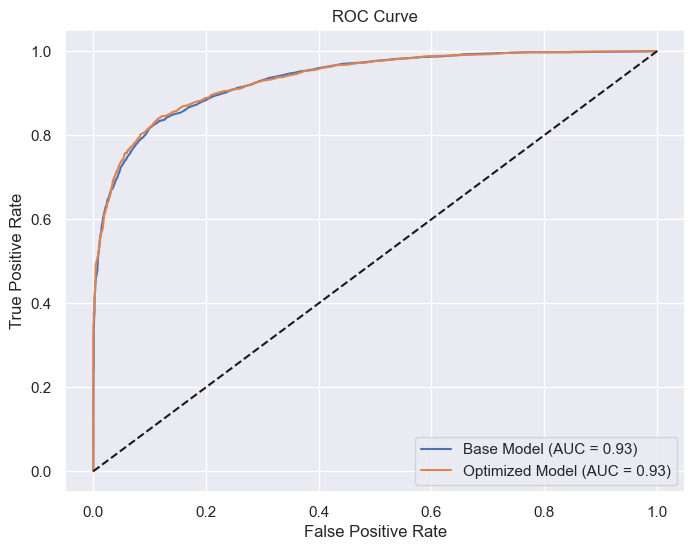

In [1321]:
base_proba = rf.predict_proba(X_test)[:, 1]

random_proba = best_random.predict_proba(X_test)[:, 1]

# Calculate AUC scores
base_auc = roc_auc_score(y_test, base_proba)
random_auc_rf = roc_auc_score(y_test, random_proba)

# Create ROC curves
base_fpr, base_tpr, _ = roc_curve(y_test, base_proba)
random_fpr_rf, random_tpr_rf, _ = roc_curve(y_test, random_proba)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(base_fpr, base_tpr, label='Base Model (AUC = {:.2f})'.format(base_auc))
plt.plot(random_fpr_rf, random_tpr_rf, label='Optimized Model (AUC = {:.2f})'.format(random_auc_rf))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Logistic Regression

In [1322]:
# Initialize and train the Logistic Regression model
logreg = LogisticRegression( max_iter=100)

logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
logreg_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"\nlogistic regression accuracy: {logreg_accuracy}")
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))


logistic regression accuracy: 0.7772194304857621


c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0    1
0  3264  385
1   812  912

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      3649
           1       0.70      0.53      0.60      1724

    accuracy                           0.78      5373
   macro avg       0.75      0.71      0.72      5373
weighted avg       0.77      0.78      0.77      5373



In [1323]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)
print('Parameters currently in use:\n')
pprint(logreg.get_params())


logreg = LogisticRegression(solver='liblinear', max_iter=1000)

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga', 'liblinear'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
}

# Randomized search
best_logreg = RandomizedSearchCV(estimator=logreg,param_distributions=param_grid,n_iter=100,
                                   cv=5,verbose=2,random_state=42,n_jobs=-1)

# Fit to your data (replace X_train and y_train with your actual data)
best_logreg.fit(X_train, y_train)
print(f"\nThe best parameters are: {best_logreg.best_params_}")

# Get the best parameters
best_params_logreg = best_logreg.best_params_

# Create a new Logistic Regression model with the best parameters
best_logreg = LogisticRegression(**best_params_logreg, random_state=42)
logreg.fit(X_train, y_train)
best_logreg.fit(X_train, y_train)

# Predict on the test data
y_pred_logreg = best_logreg.predict(X_test)

# Evaluate the model's performance
OPT_logreg_accuracy = metrics.accuracy_score(y_test, y_pred_logreg)
print(f"\nOptimized logistic regression accuracy: {OPT_logreg_accuracy}")
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_logreg)))
print(metrics.classification_report(y_test, y_pred_logreg))



Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



The best parameters are: {'solver': 'lbfgs', 'max_iter': 1000, 'class_weight': None, 'C': 1.0}

Optimized logistic regression accuracy: 0.7904336497301322


c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0    1
0  3270  379
1   747  977

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      3649
           1       0.72      0.57      0.63      1724

    accuracy                           0.79      5373
   macro avg       0.77      0.73      0.74      5373
weighted avg       0.78      0.79      0.78      5373



In [1324]:
print('logistic regression accuracy: {:0.2f}%'.format(logreg_accuracy*100))
print('Optimized logistic regression accuracy: {:0.2f}%'.format(OPT_logreg_accuracy*100))

# Calculate improvement
improvement = 100 * (OPT_logreg_accuracy - logreg_accuracy) / logreg_accuracy
print('Improvement: {:0.2f}%'.format(improvement))

logistic regression accuracy: 77.72%
Optimized logistic regression accuracy: 79.04%
Improvement: 1.70%


In [1325]:
# Extract feature importances from both models
base_importances = logreg.feature_importances_
optimized_importances = best_logreg.feature_importances_

# Create a bar plot to visualize feature importances
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(base_importances))
bar_width = 0.4

ax.bar(x, base_importances, label='Base Model', width=bar_width, alpha=0.7)
ax.bar(x, optimized_importances, label='Optimized Model', width=bar_width, alpha=0.7, color='orange')

ax.set_xticks(x)
ax.set_xticklabels(X.columns, rotation=90)
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances - Base Model vs Optimized Model')
ax.legend()

# Show the improvement percentage below the plot
plt.tight_layout()
plt.show()


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

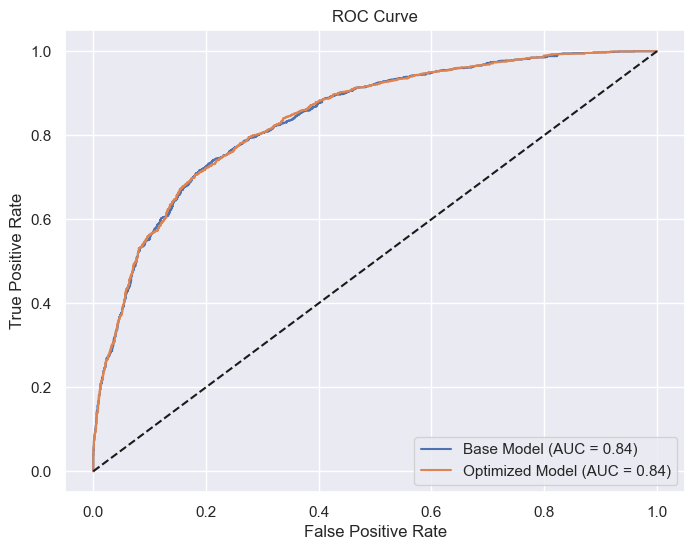

In [1326]:
base_proba = logreg.predict_proba(X_test)[:, 1]

random_proba = best_logreg.predict_proba(X_test)[:, 1]

# Calculate AUC scores
base_auc = roc_auc_score(y_test, base_proba)
random_auc_lr = roc_auc_score(y_test, random_proba)

# Create ROC curves
base_fpr, base_tpr, _ = roc_curve(y_test, base_proba)
random_fpr_lr, random_tpr_lr, _ = roc_curve(y_test, random_proba)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(base_fpr, base_tpr, label='Base Model (AUC = {:.2f})'.format(base_auc))
plt.plot(random_fpr_lr, random_tpr_lr, label='Optimized Model (AUC = {:.2f})'.format(random_auc_lr))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [1327]:
print('Optimized decision tree accuracy: {:0.2f}%'.format(OPT_tree_accuracy*100))
print('Optimized random forest accuracy: {:0.2f}%'.format(OPT_forest_accuracy*100))
print('Optimized logistic regression accuracy: {:0.2f}%'.format(OPT_logreg_accuracy*100))

Optimized decision tree accuracy: 85.17%
Optimized random forest accuracy: 88.29%
Optimized logistic regression accuracy: 79.04%


## ROC curve comparison

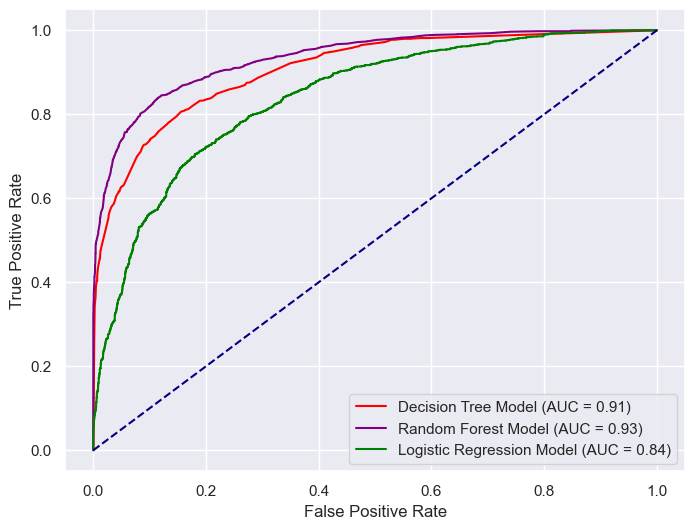

In [1328]:
plt.figure(figsize=(8, 6))
plt.plot(random_fpr_dt, random_tpr_dt, color = 'red', label='Decision Tree Model (AUC = {:.2f})'.format(random_auc_dt))
plt.plot(random_fpr_rf, random_tpr_rf, color = 'purple', label='Random Forest Model (AUC = {:.2f})'.format(random_auc_rf))
plt.plot(random_fpr_lr, random_tpr_lr, color = 'green', label='Logistic Regression Model (AUC = {:.2f})'.format(random_auc_lr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()